In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd

#from sklearn import OneHotEncoder

# per importare cose nella folder precedente da ora in poi
import sys
sys.path.append('../')

from layer import HiddenLayer
from activations import *
from losses import *
from network import Network
from regularizers import *
from utils import *
from metrics import *
from validation import *
from gridsearch import grid_search

random.seed(42)
np.random.seed(42)

# Progress bar
from tqdm import tqdm
import time

In [2]:
X_train, y_train, test = read_cup("../data/ML-CUP23-TR.csv", "../data/ML-CUP23-TS.csv")

In [3]:
from sklearn.preprocessing import MinMaxScaler
rescaler = MinMaxScaler()
y_train = y_train.reshape(y_train.shape[0], y_train.shape[1])
rescaler.fit(y_train)
y_train = rescaler.transform(y_train)
y_train = y_train.reshape(y_train.shape[0], y_train.shape[1], 1)

In [11]:
seed = 3
np.random.seed(seed)
net = Network(MSE(1), eta=1e-3)

net.add_layer(
    input_size=len(X_train[0]),
    units_size=32,
    starting=Range_random(),
    regularizer=L2(lambda_=1e-8),
    activation=ReLU(),
    momentum=('Nesterov', 0.9),
)

net.add_layer(
    input_size=32,
    units_size=32,
    starting=Range_random(),
    regularizer=L2(lambda_=1e-8),
    activation=ReLU(),
    momentum=('Nesterov', 0.9),
)

net.add_layer(
    input_size=32,
    units_size=3,
    starting=Range_random(),
    regularizer=L2(lambda_=1e-8),
    activation=Identity(),
    momentum=('Nesterov', 0.9),
)

In [4]:
X_split = np.array_split(X_train, 5)
y_split = np.array_split(y_train, 5)

X_train = np.concatenate(X_split[:4] + (X_split[4 + 1:]))
y_train = np.concatenate(y_split[:4] + (y_split[4 + 1:]))

X_val = X_split[4]
y_val = y_split[4]

Epochs:  40%|███▉      | 3964/10000 [06:42<10:12,  9.85it/s]  


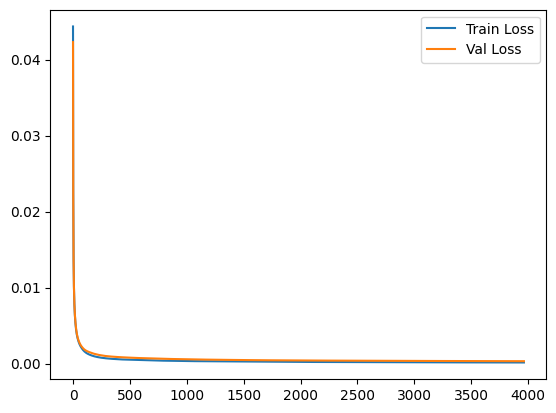

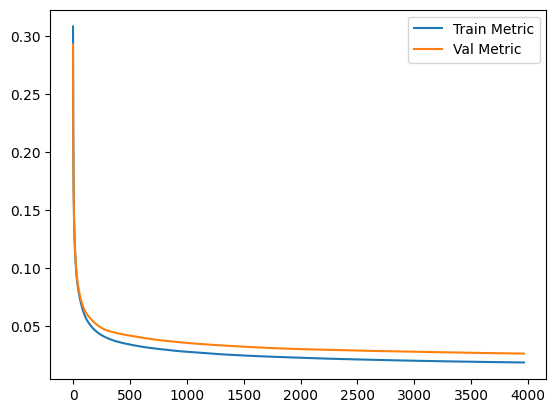

In [13]:
info = net.train(
    X_train, 
    y_train,
    X_val,
    y_val,
    10000,
    100,
    MEE()
)
plt.plot(info['tr_losses'], label='Train Loss')
plt.plot(info['val_losses'], label='Val Loss')
plt.legend()
plt.show()

plt.plot(info['tr_metrics'], label='Train Metric')
plt.plot(info['val_metrics'], label='Val Metric')
plt.legend()
plt.show()

In [15]:
print(net.statistics(X_train, y_train, MEE()))
print(net.statistics(X_val, y_val, MEE()))

(0.00014487693677929463, 0.018368050137334523)
(0.00031508128630263827, 0.026063237516497265)


In [ ]:
statistics = kfold_crossval(
    X=X_train,
    y=y_train,
    k=6,
    net=net,
    epochs=2500,
    patience=100,
    seed=seed,
    metric=MEE()
)

print(statistics)

Combination: [32, 32, 3] ReLU Range_random (-0.5, 0.5) L2 1e-08 ('Nesterov', 0.9) 0.01


Epochs:  15%|█▌        | 1546/10000 [02:32<13:54, 10.13it/s]


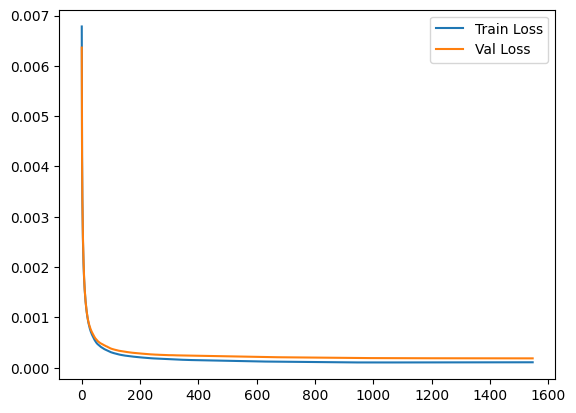

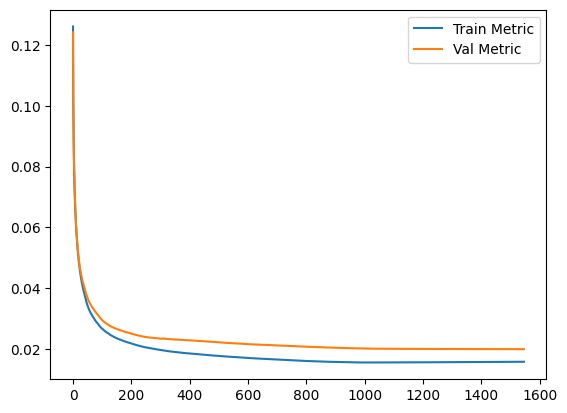

Fold 1 of 6 completed
Train Loss: 0.00010779502875861495
Train Metric: 0.015662861015118594
Val Loss: 0.00018879450521150815
Val Metric: 0.019986489498674567


Epochs:  12%|█▏        | 1176/10000 [01:56<14:33, 10.10it/s]


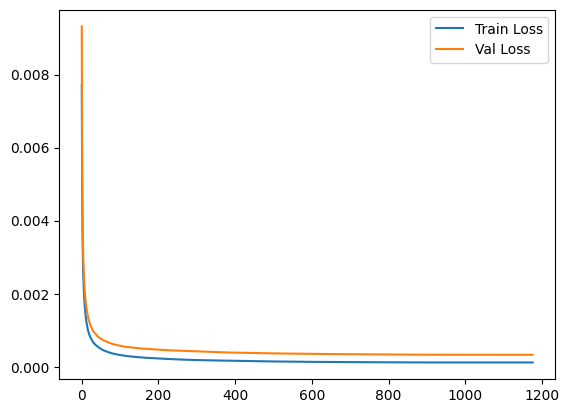

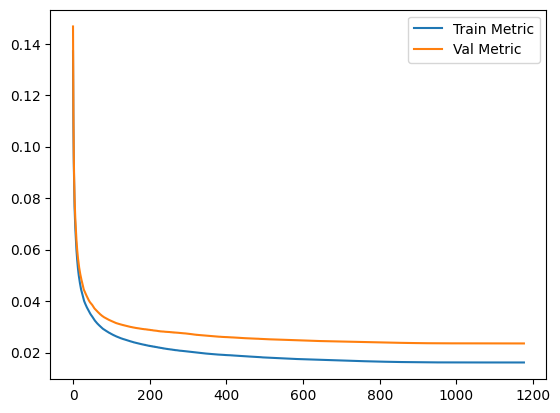

Fold 2 of 6 completed
Train Loss: 0.00011661629611841884
Train Metric: 0.0161783700797086
Val Loss: 0.0003284291126832956
Val Metric: 0.023607662317255296


Epochs:  12%|█▏        | 1181/10000 [01:56<14:31, 10.12it/s]


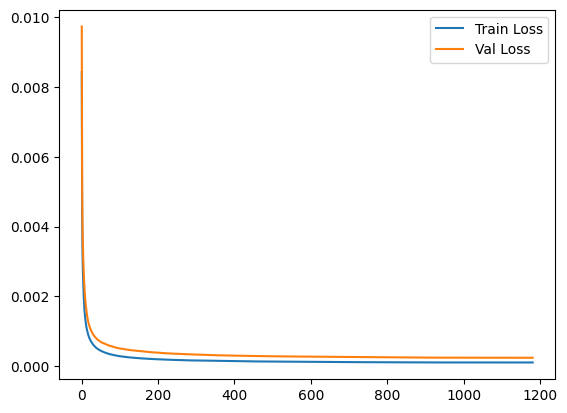

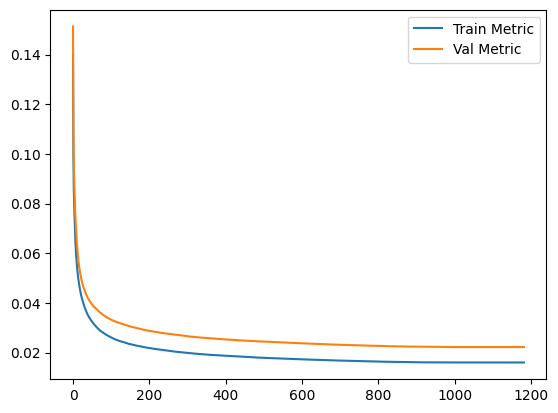

Fold 3 of 6 completed
Train Loss: 0.00011106550403529081
Train Metric: 0.016091462886687977
Val Loss: 0.00024799847712622767
Val Metric: 0.022322241659850108


Epochs:  16%|█▌        | 1594/10000 [02:41<14:11,  9.87it/s]


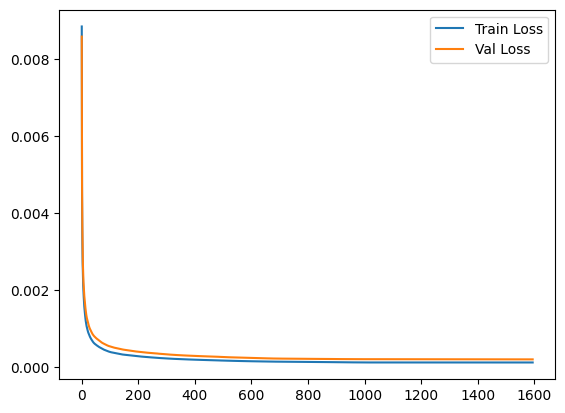

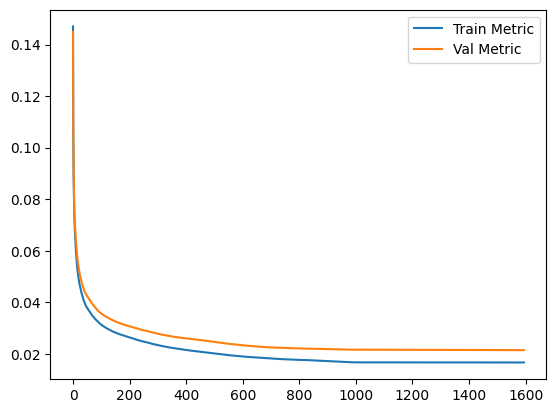

Fold 4 of 6 completed
Train Loss: 0.00012018739713682003
Train Metric: 0.016670172013877528
Val Loss: 0.00020253382905218955
Val Metric: 0.021514818976740378


Epochs:  20%|██        | 2024/10000 [03:14<12:44, 10.43it/s]


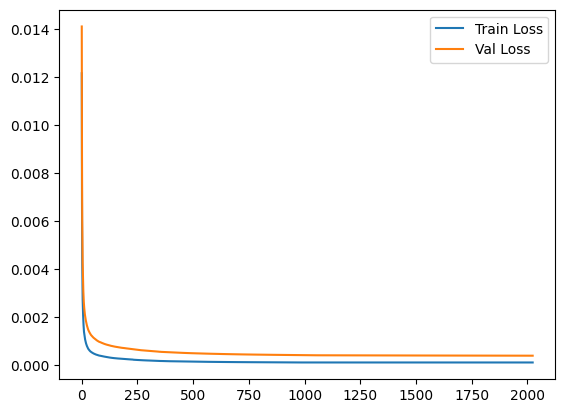

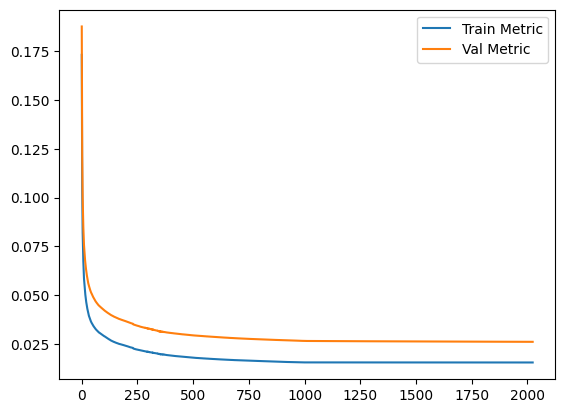

Fold 5 of 6 completed
Train Loss: 0.00010753744386280576
Train Metric: 0.015716172282153607
Val Loss: 0.00039349498683485253
Val Metric: 0.026351461381804466


Epochs:  14%|█▎        | 1354/10000 [02:08<13:37, 10.58it/s]


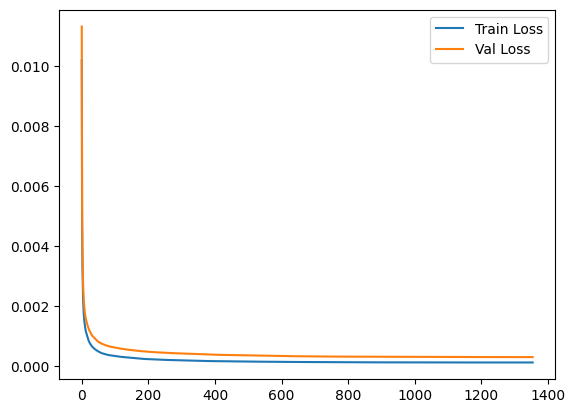

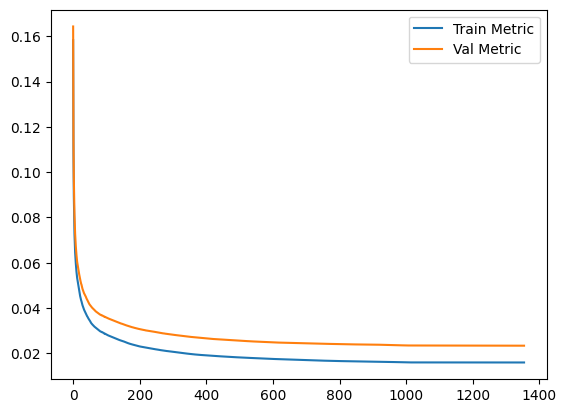

Fold 6 of 6 completed
Train Loss: 0.00011331672907496622
Train Metric: 0.015948444095653214
Val Loss: 0.0002949994562945854
Val Metric: 0.023416054373449832
Combination: [32, 32, 3] ReLU Range_random (-0.5, 0.5) L2 1e-08 ('Nesterov', 0.9) 0.01
Statistics: {'tr_loss': 0.00011275306649781944, 'tr_metric': 0.01604458039553325, 'val_loss': 0.00027604172786710983, 'val_metric': 0.022866454701295776}




Combination: [32, 32, 3] ReLU Range_random (-0.5, 0.5) L2 1e-08 ('Standard', 0.9) 0.01


Epochs:  12%|█▏        | 1188/10000 [01:50<13:40, 10.74it/s]


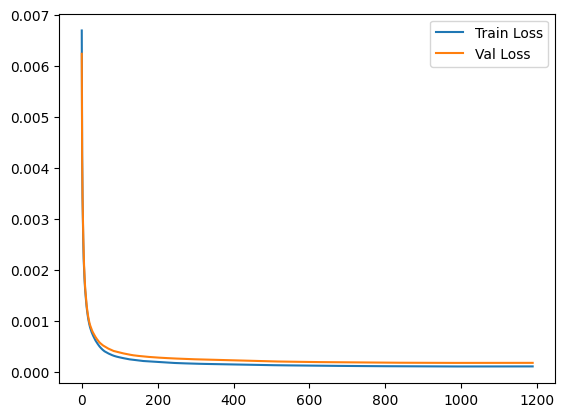

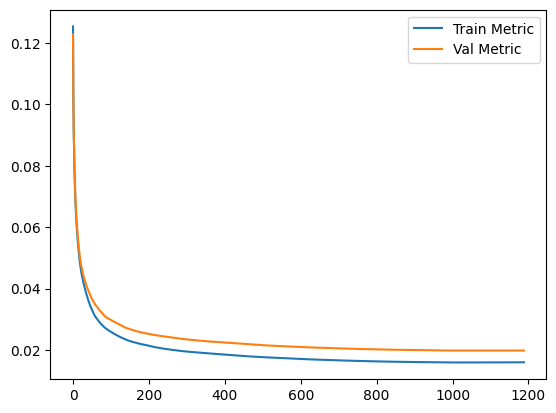

Fold 1 of 6 completed
Train Loss: 0.00011142321496586406
Train Metric: 0.016007524148841226
Val Loss: 0.00018110490082793028
Val Metric: 0.019909158715618006


Epochs:  12%|█▏        | 1203/10000 [01:48<13:12, 11.10it/s]


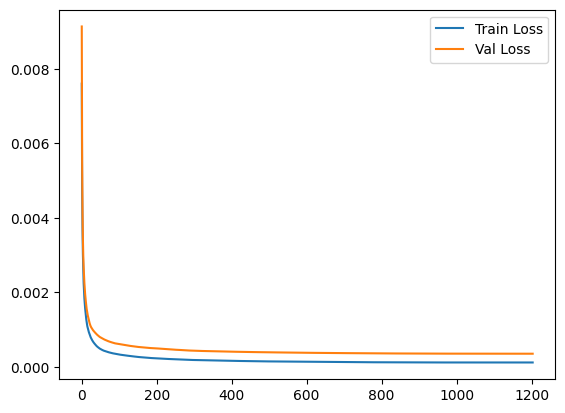

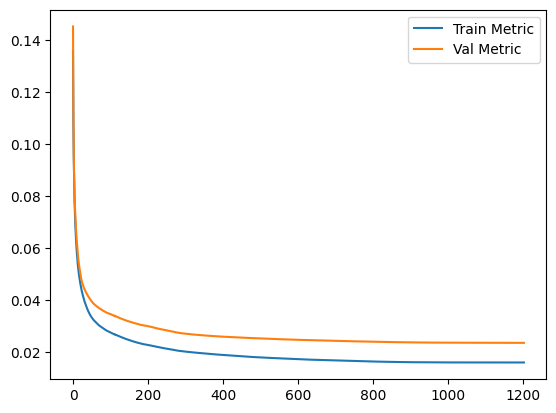

Fold 2 of 6 completed
Train Loss: 0.0001146165421757126
Train Metric: 0.0161264815427856
Val Loss: 0.000351862520135982
Val Metric: 0.023736236912306096


Epochs:  12%|█▏        | 1247/10000 [01:52<13:09, 11.08it/s]


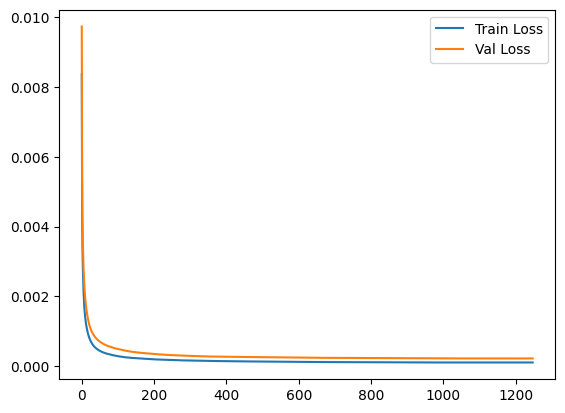

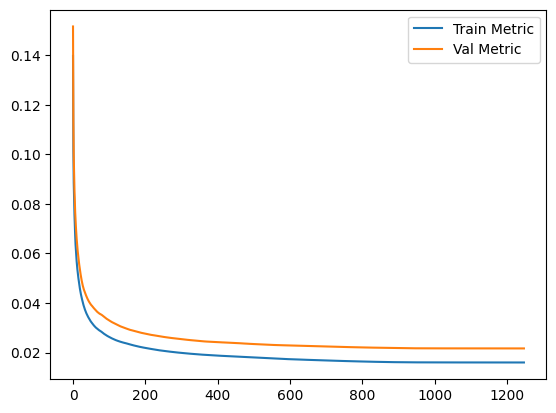

Fold 3 of 6 completed
Train Loss: 0.00011155629978953619
Train Metric: 0.016003782203748495
Val Loss: 0.00022764654051072428
Val Metric: 0.0216778187308688


Epochs:  11%|█▏        | 1142/10000 [01:42<13:17, 11.10it/s]


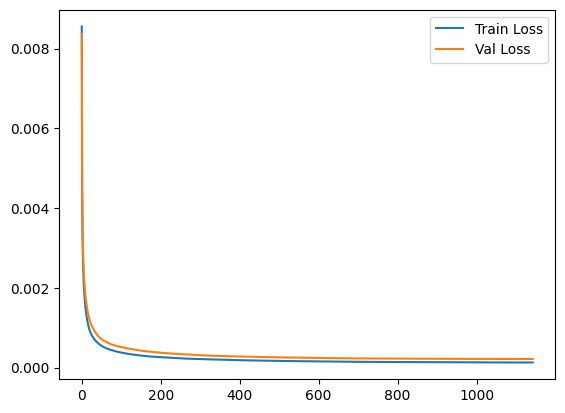

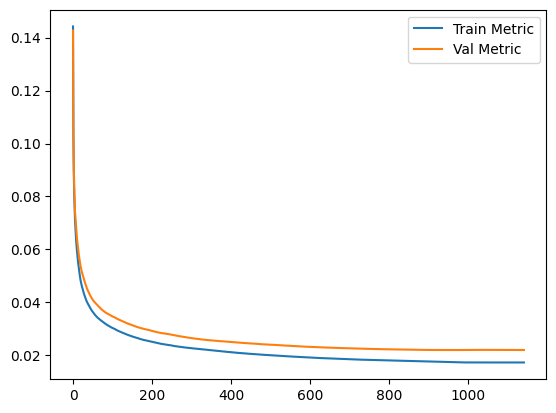

Fold 4 of 6 completed
Train Loss: 0.00013399500088035203
Train Metric: 0.01771435615074997
Val Loss: 0.00021746430587037488
Val Metric: 0.02204029471236421


Epochs:  15%|█▌        | 1543/10000 [02:15<12:24, 11.36it/s]


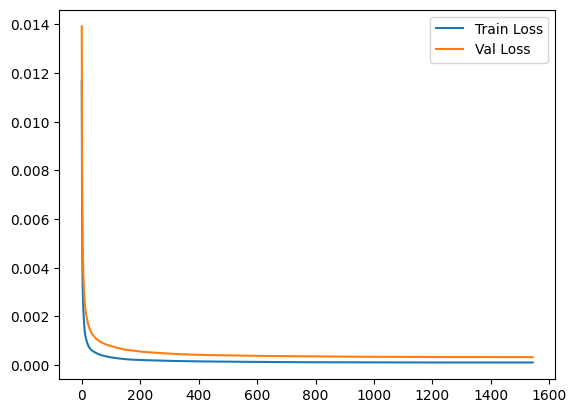

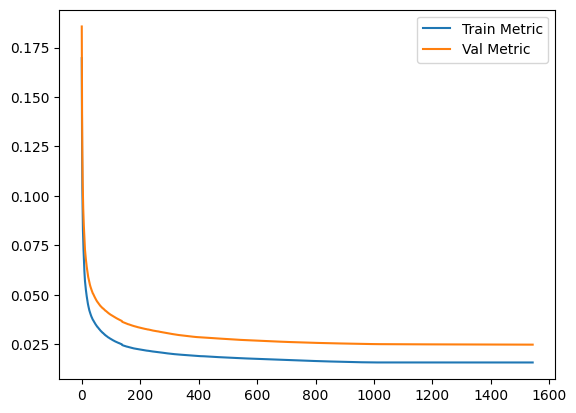

Fold 5 of 6 completed
Train Loss: 0.00010850142762798249
Train Metric: 0.015774579934896636
Val Loss: 0.0003329175649271561
Val Metric: 0.024875733644568812


Epochs:  15%|█▍        | 1481/10000 [02:06<12:09, 11.68it/s]


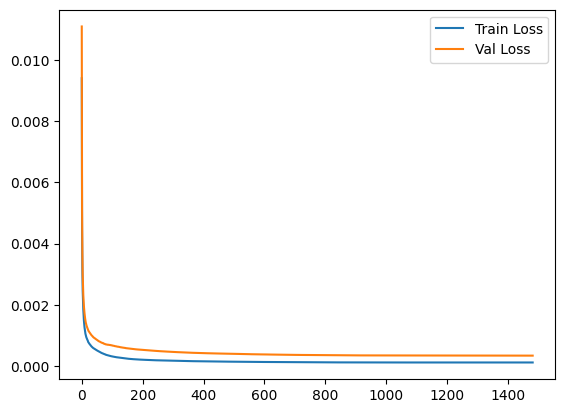

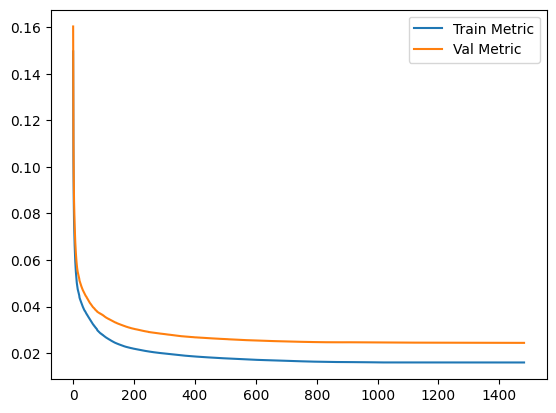

Fold 6 of 6 completed
Train Loss: 0.00011527668268724038
Train Metric: 0.015969235303721734
Val Loss: 0.0003418426887581499
Val Metric: 0.02445225440426406
Combination: [32, 32, 3] ReLU Range_random (-0.5, 0.5) L2 1e-08 ('Standard', 0.9) 0.01
Statistics: {'tr_loss': 0.00011589486135444796, 'tr_metric': 0.016265993214123944, 'val_loss': 0.00027547308683838624, 'val_metric': 0.022781916186665}




Combination: [32, 32, 3] ReLU Range_random (-0.1, 0.1) L2 1e-08 ('Nesterov', 0.9) 0.01


Epochs:  12%|█▏        | 1230/10000 [01:53<13:31, 10.81it/s]


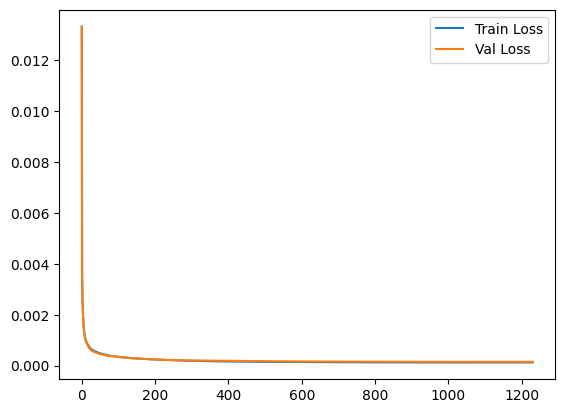

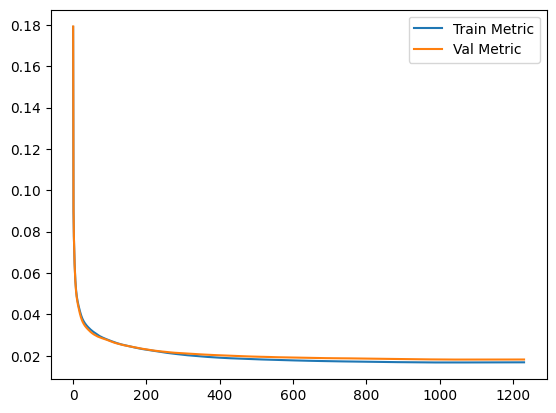

Fold 1 of 6 completed
Train Loss: 0.00012459430022439933
Train Metric: 0.016764171704122376
Val Loss: 0.00014979374935961733
Val Metric: 0.018223154593548226


Epochs:  12%|█▏        | 1213/10000 [01:52<13:33, 10.80it/s]


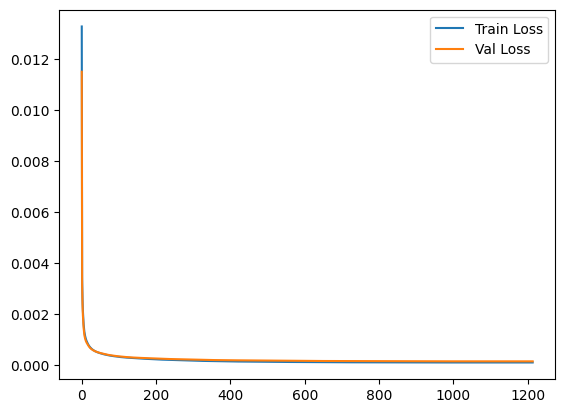

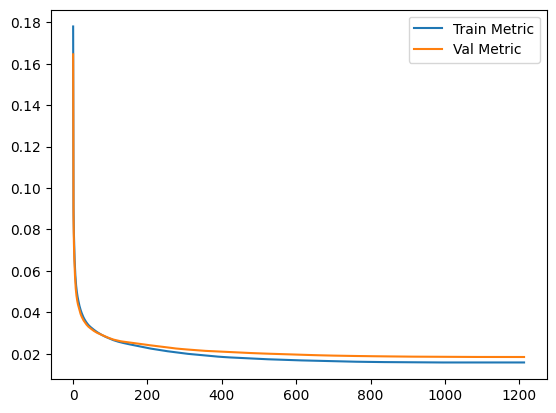

Fold 2 of 6 completed
Train Loss: 0.00011265205510080012
Train Metric: 0.01578963818161001
Val Loss: 0.00015790594476348697
Val Metric: 0.018507941184304242


Epochs:  11%|█         | 1099/10000 [01:42<13:47, 10.75it/s]


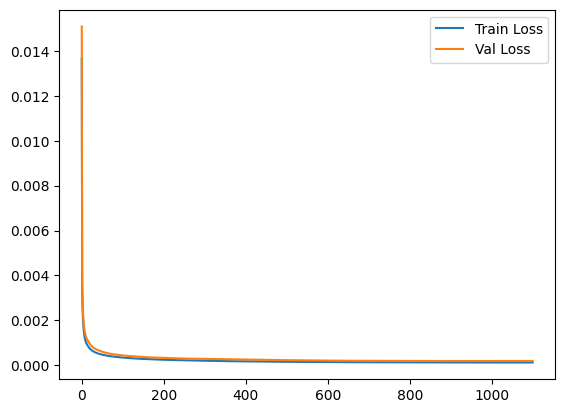

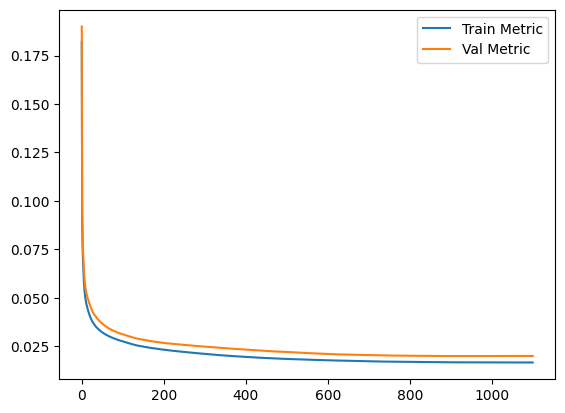

Fold 3 of 6 completed
Train Loss: 0.00012824961107297964
Train Metric: 0.016771667475182796
Val Loss: 0.00019160398737368904
Val Metric: 0.019967111030264714


Epochs:  11%|█▏        | 1125/10000 [01:45<13:50, 10.68it/s]


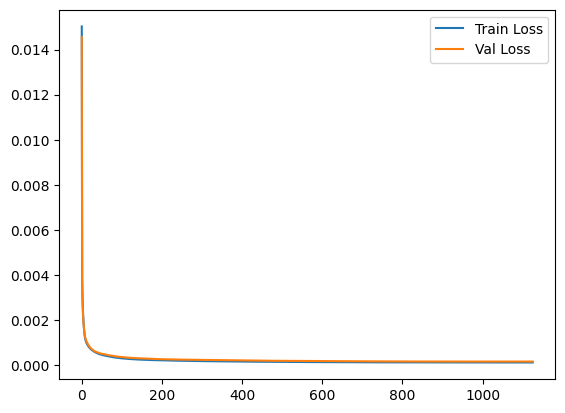

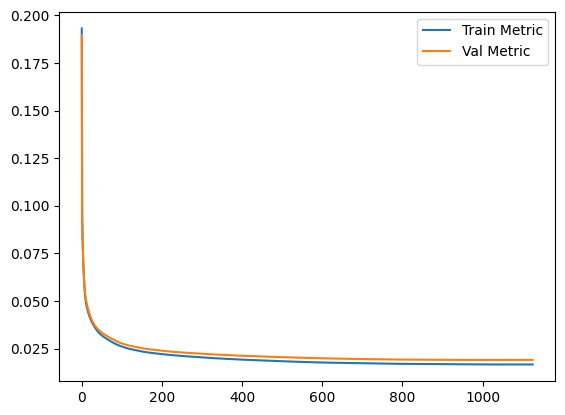

Fold 4 of 6 completed
Train Loss: 0.00012661457626194337
Train Metric: 0.016883504622165545
Val Loss: 0.00016626259971723337
Val Metric: 0.019118517621903496


Epochs:  12%|█▏        | 1204/10000 [01:52<13:41, 10.70it/s]


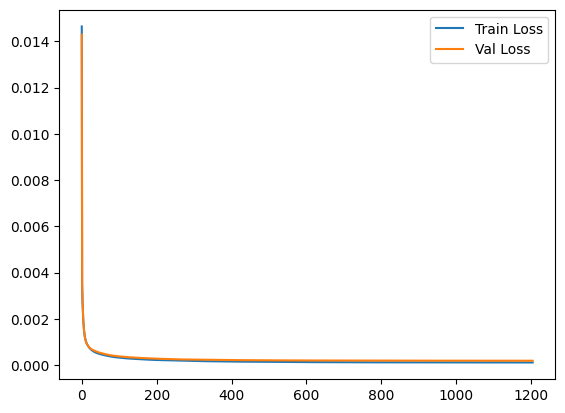

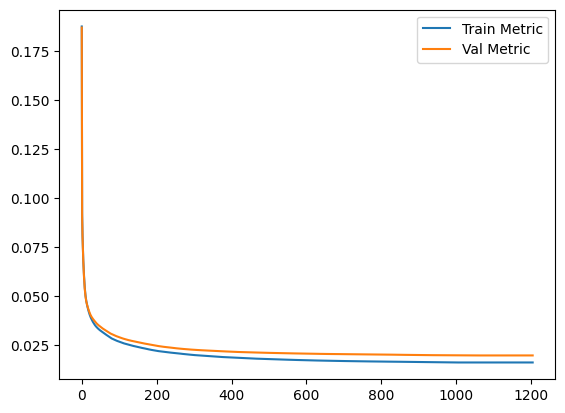

Fold 5 of 6 completed
Train Loss: 0.00011784023507350997
Train Metric: 0.016424853247403486
Val Loss: 0.0001939773373288603
Val Metric: 0.01999948448479785


Epochs:  12%|█▏        | 1237/10000 [01:55<13:35, 10.75it/s]


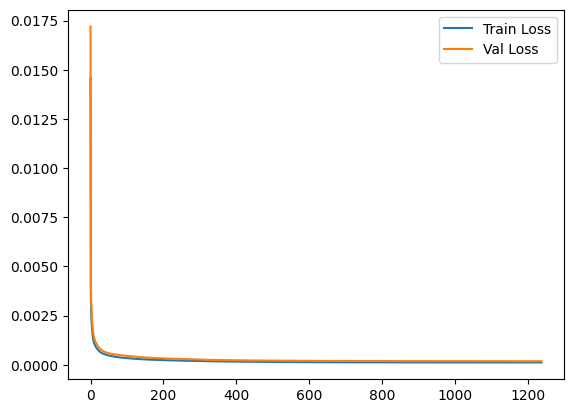

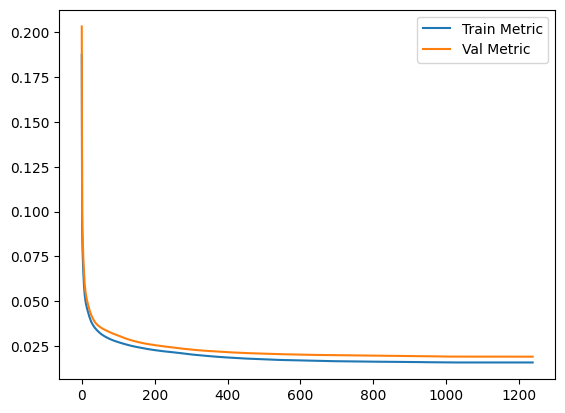

Fold 6 of 6 completed
Train Loss: 0.00011246590831566338
Train Metric: 0.015860033893226367
Val Loss: 0.0001773585885359494
Val Metric: 0.019168986675233975
Combination: [32, 32, 3] ReLU Range_random (-0.1, 0.1) L2 1e-08 ('Nesterov', 0.9) 0.01
Statistics: {'tr_loss': 0.00012040278100821598, 'tr_metric': 0.016415644853951764, 'val_loss': 0.0001728170345131394, 'val_metric': 0.019164199265008754}




Combination: [32, 32, 3] ReLU Range_random (-0.1, 0.1) L2 1e-08 ('Standard', 0.9) 0.01


Epochs:  12%|█▏        | 1227/10000 [01:44<12:24, 11.78it/s]


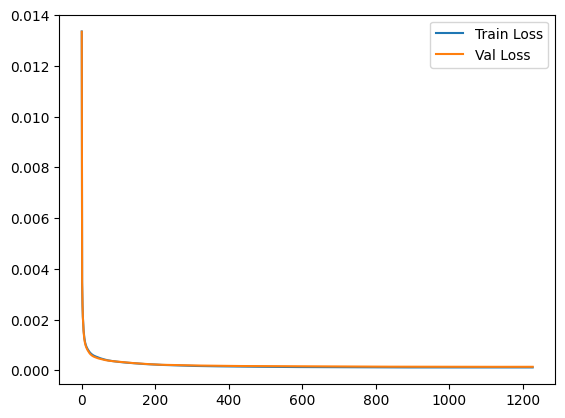

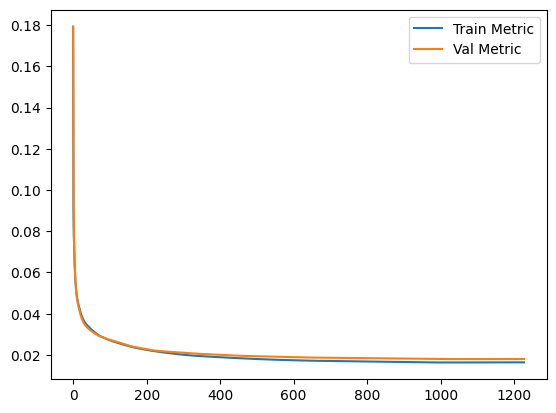

Fold 1 of 6 completed
Train Loss: 0.0001171252225086903
Train Metric: 0.01635329532727524
Val Loss: 0.00014356581285016455
Val Metric: 0.01804824746503271


Epochs:  14%|█▍        | 1394/10000 [01:57<12:07, 11.82it/s]


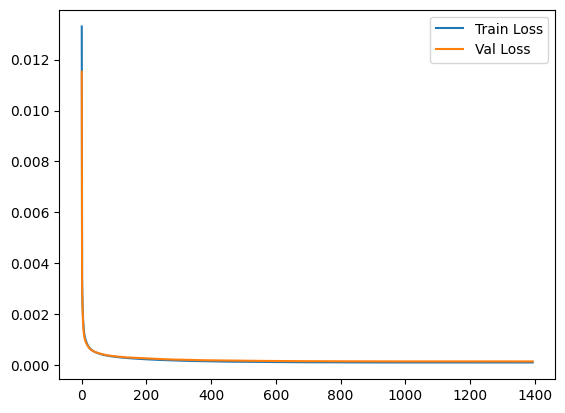

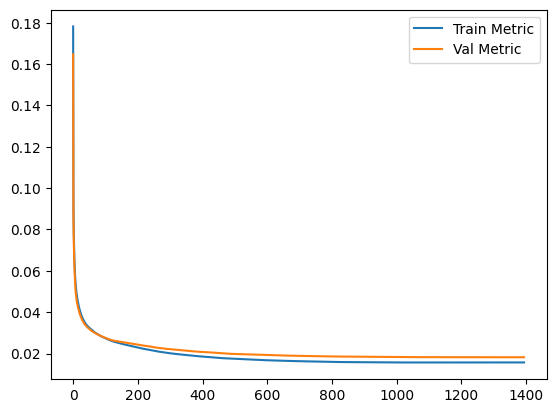

Fold 2 of 6 completed
Train Loss: 0.00011087388386617203
Train Metric: 0.015666593444400755
Val Loss: 0.00015298737510181408
Val Metric: 0.018220930610616397


Epochs:  11%|█         | 1097/10000 [01:32<12:32, 11.83it/s]


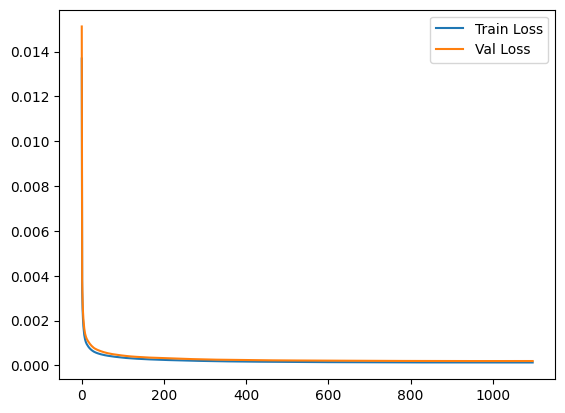

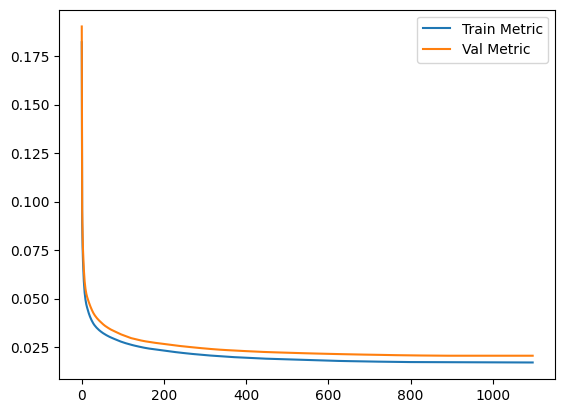

Fold 3 of 6 completed
Train Loss: 0.0001330702098901794
Train Metric: 0.017176029794404184
Val Loss: 0.0001962676618509172
Val Metric: 0.020597007275252453


Epochs:  12%|█▏        | 1184/10000 [01:40<12:30, 11.75it/s]


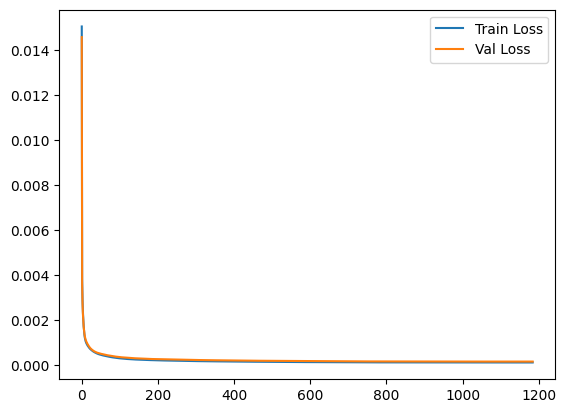

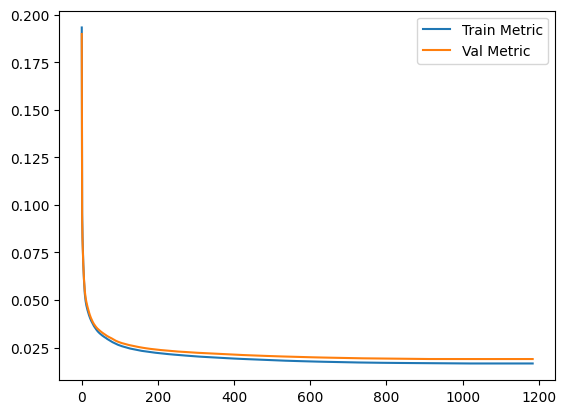

Fold 4 of 6 completed
Train Loss: 0.00012487784642873983
Train Metric: 0.016739633769641715
Val Loss: 0.00016365044474735794
Val Metric: 0.01894557419438763


Epochs:  12%|█▏        | 1214/10000 [01:42<12:25, 11.79it/s]


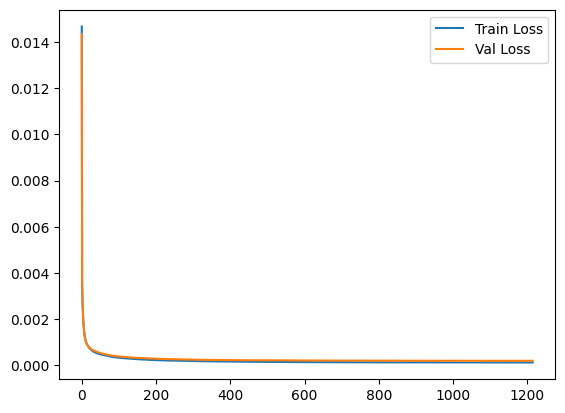

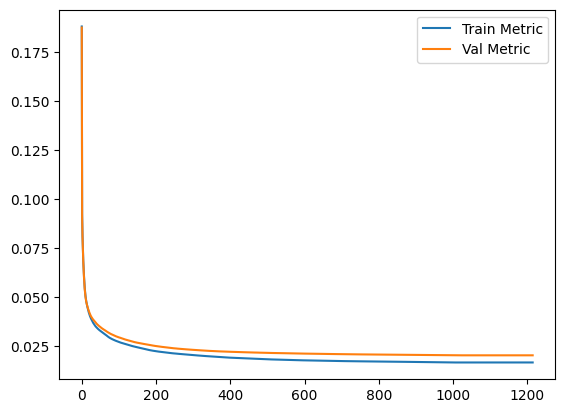

Fold 5 of 6 completed
Train Loss: 0.00012110356568346936
Train Metric: 0.016533890547421406
Val Loss: 0.00019456898891661046
Val Metric: 0.02016594815089959


Epochs:  13%|█▎        | 1288/10000 [01:50<12:27, 11.65it/s]


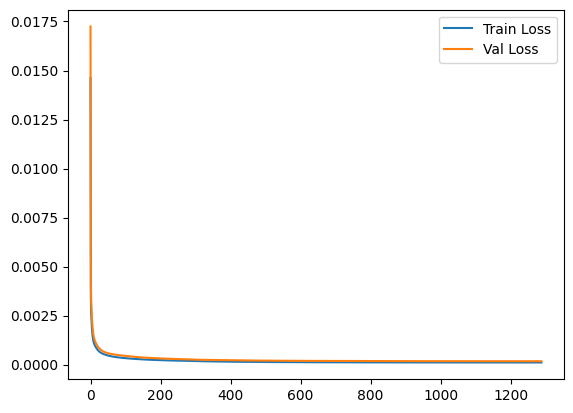

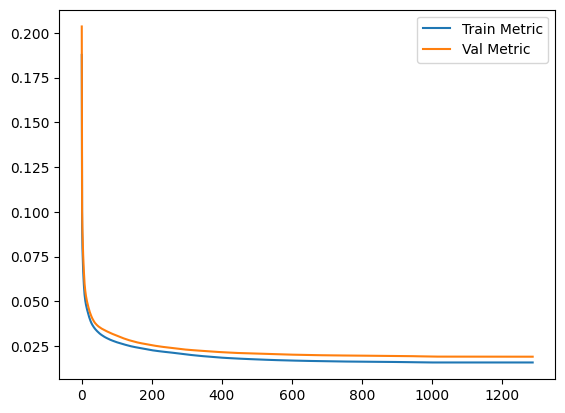

Fold 6 of 6 completed
Train Loss: 0.00011220583906639712
Train Metric: 0.01584710289466776
Val Loss: 0.00017693495319712267
Val Metric: 0.01911450850959461
Combination: [32, 32, 3] ReLU Range_random (-0.1, 0.1) L2 1e-08 ('Standard', 0.9) 0.01
Statistics: {'tr_loss': 0.00011987609457394133, 'tr_metric': 0.016386090962968513, 'val_loss': 0.00017132920611066446, 'val_metric': 0.01918203603429723}




Combination: [32, 32, 32, 3] ReLU Range_random (-0.5, 0.5) L2 1e-08 ('Nesterov', 0.9) 0.01


Epochs:  12%|█▏        | 1211/10000 [02:36<18:54,  7.74it/s]


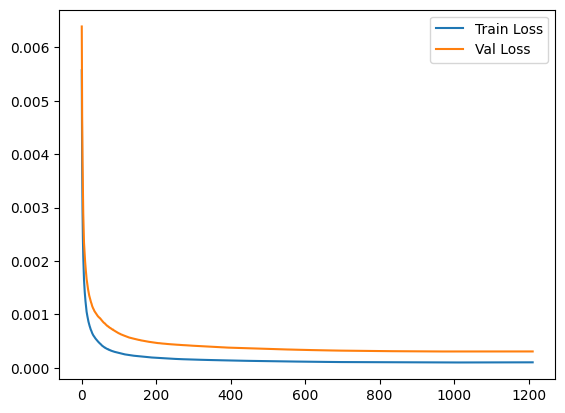

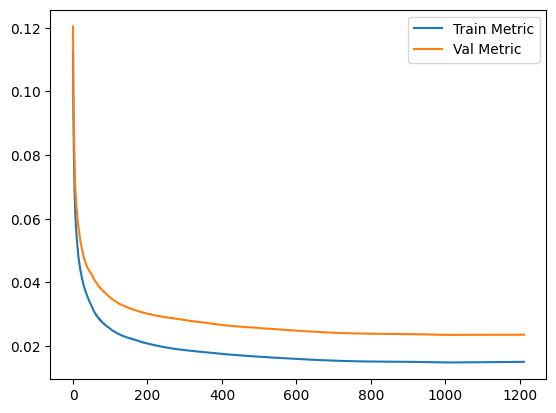

Fold 1 of 6 completed
Train Loss: 9.83048439949376e-05
Train Metric: 0.014958689850577116
Val Loss: 0.00030403784537762804
Val Metric: 0.023652440946289717


Epochs:  40%|███▉      | 3951/10000 [08:28<12:57,  7.78it/s]


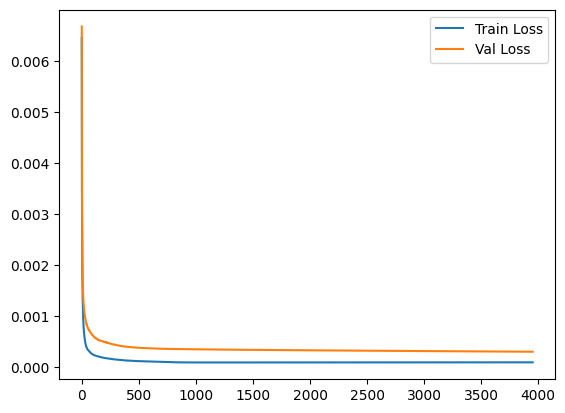

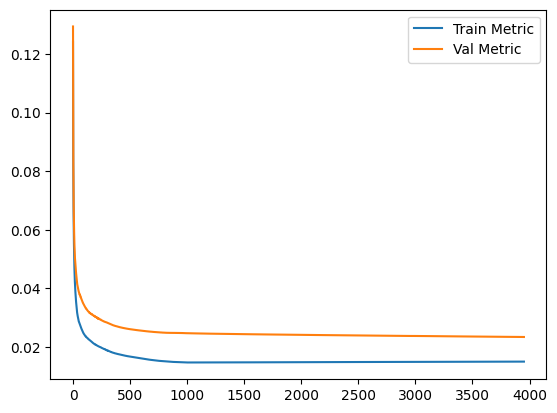

Fold 2 of 6 completed
Train Loss: 9.731948574607994e-05
Train Metric: 0.015036059771158876
Val Loss: 0.00030816747252663607
Val Metric: 0.023544830042165916


Epochs:  15%|█▍        | 1456/10000 [03:07<18:22,  7.75it/s]


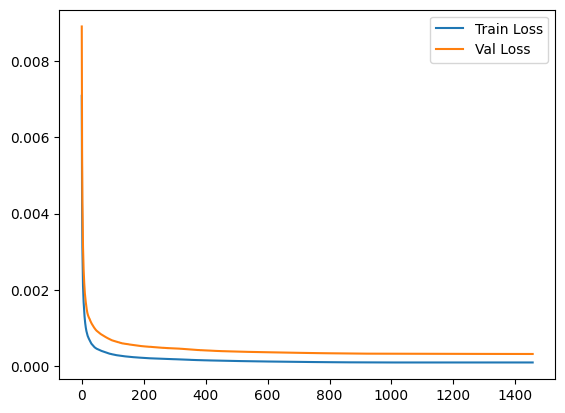

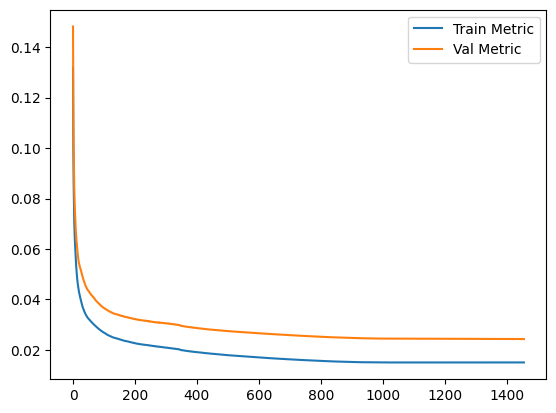

Fold 3 of 6 completed
Train Loss: 9.665676728091692e-05
Train Metric: 0.015023129419730068
Val Loss: 0.00032226309298481184
Val Metric: 0.024411529127553924


Epochs:  12%|█▏        | 1185/10000 [02:32<18:58,  7.75it/s]


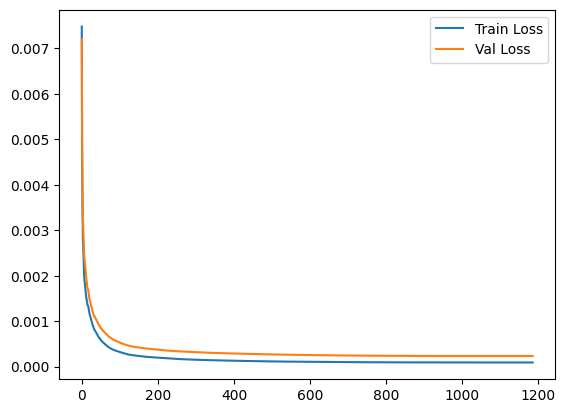

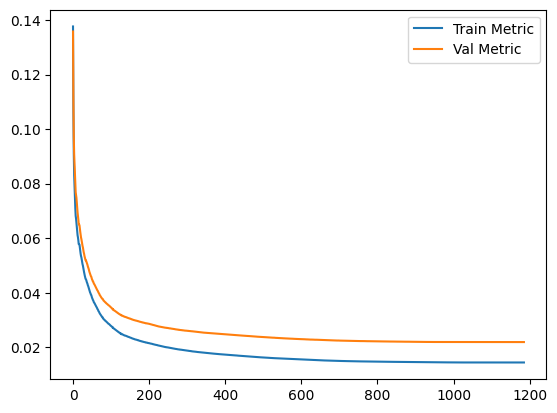

Fold 4 of 6 completed
Train Loss: 9.162713158477167e-05
Train Metric: 0.014514257165714119
Val Loss: 0.00023312553656570844
Val Metric: 0.021932511930642582


Epochs:  32%|███▏      | 3172/10000 [06:49<14:42,  7.74it/s]


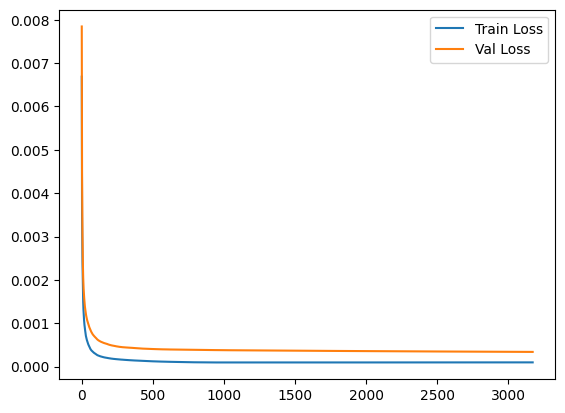

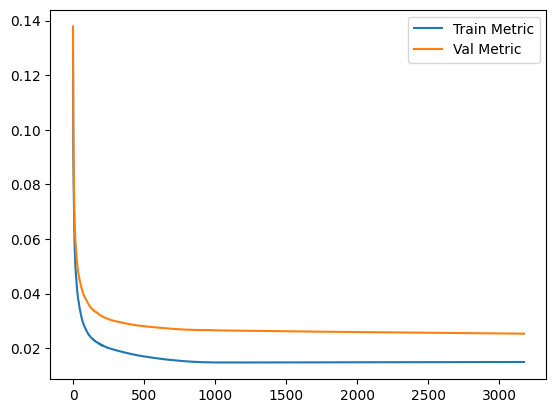

Fold 5 of 6 completed
Train Loss: 9.6205065536885e-05
Train Metric: 0.014929471394023222
Val Loss: 0.0003412360015655421
Val Metric: 0.025434272536672943


Epochs:  25%|██▍       | 2485/10000 [05:21<16:11,  7.73it/s]


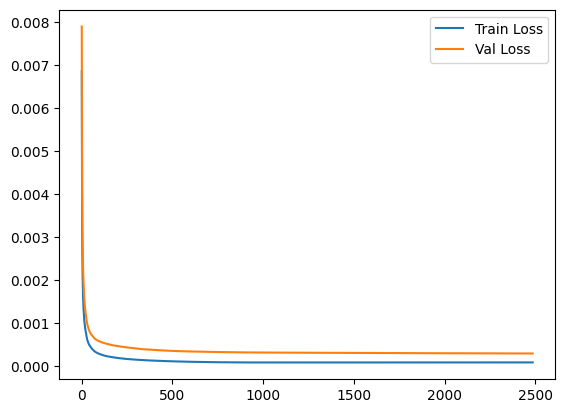

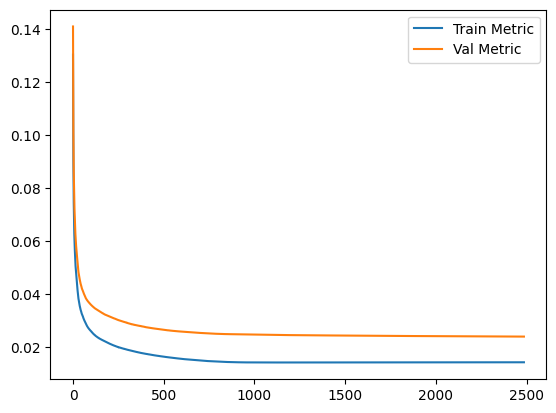

Fold 6 of 6 completed
Train Loss: 8.677610850175379e-05
Train Metric: 0.01410103342956182
Val Loss: 0.0002973422491339686
Val Metric: 0.023893220938307813
Combination: [32, 32, 32, 3] ReLU Range_random (-0.5, 0.5) L2 1e-08 ('Nesterov', 0.9) 0.01
Statistics: {'tr_loss': 9.448156710755748e-05, 'tr_metric': 0.014760440171794202, 'val_loss': 0.0003010286996923825, 'val_metric': 0.023811467586938816}




Combination: [32, 32, 32, 3] ReLU Range_random (-0.5, 0.5) L2 1e-08 ('Standard', 0.9) 0.01


Epochs:  18%|█▊        | 1808/10000 [03:31<15:59,  8.54it/s]


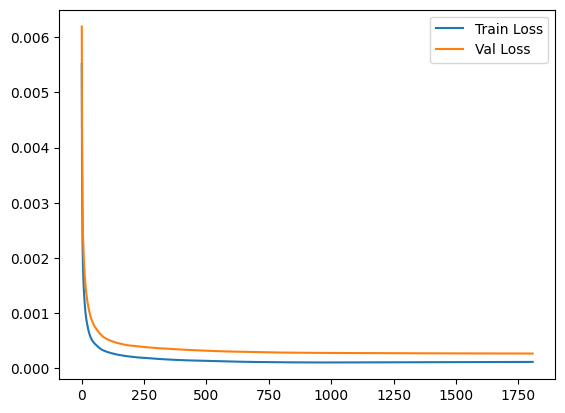

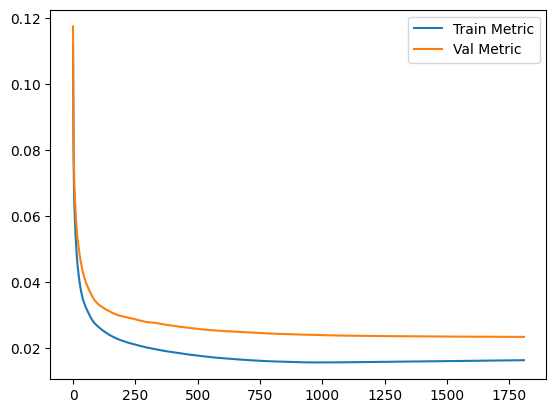

Fold 1 of 6 completed
Train Loss: 0.00011561590365216805
Train Metric: 0.016192579344170045
Val Loss: 0.0002728474930862636
Val Metric: 0.023553650465252682


Epochs:  23%|██▎       | 2300/10000 [04:31<15:08,  8.48it/s]


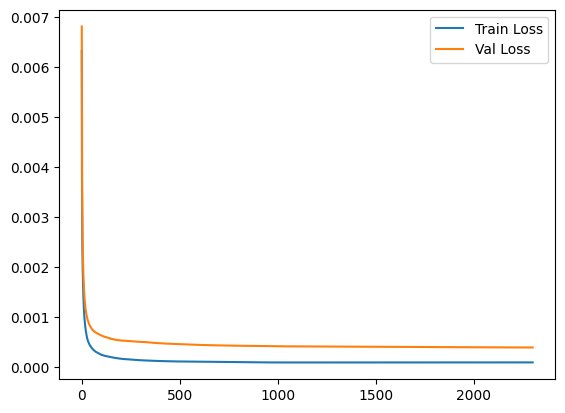

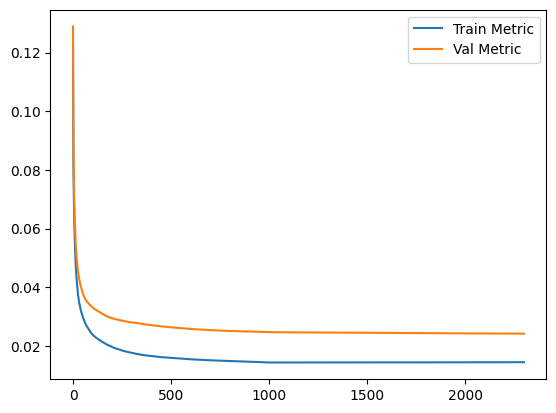

Fold 2 of 6 completed
Train Loss: 9.13526451211873e-05
Train Metric: 0.014460941054506847
Val Loss: 0.0003939477493767423
Val Metric: 0.024294172935855757


Epochs:  12%|█▏        | 1225/10000 [02:24<17:15,  8.47it/s]


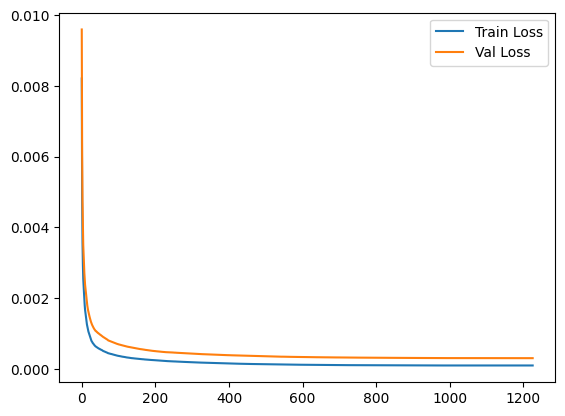

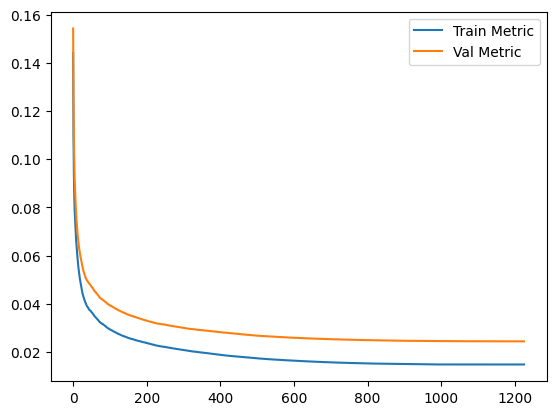

Fold 3 of 6 completed
Train Loss: 9.509580818069406e-05
Train Metric: 0.014763877343990565
Val Loss: 0.0003044419813489885
Val Metric: 0.02444097712865526


Epochs:  14%|█▍        | 1384/10000 [02:43<16:56,  8.47it/s]


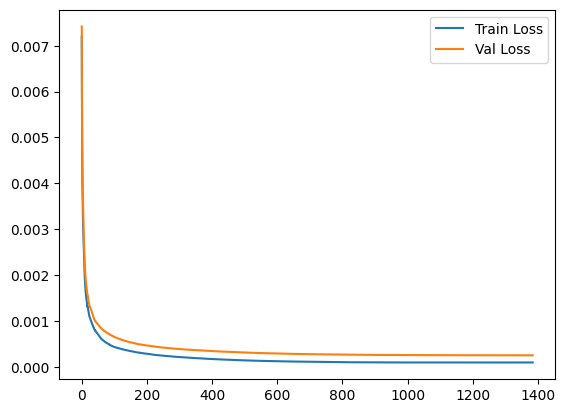

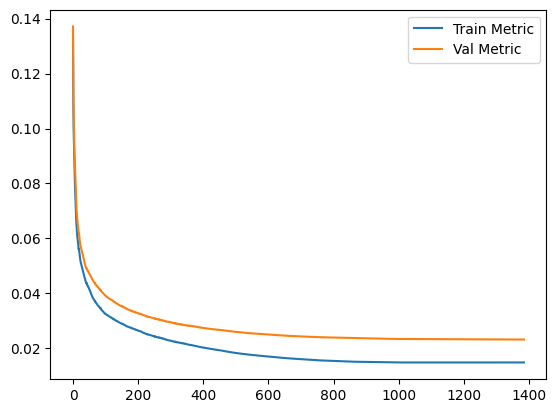

Fold 4 of 6 completed
Train Loss: 9.475515116436531e-05
Train Metric: 0.01486011154893601
Val Loss: 0.0002530032962990184
Val Metric: 0.023325691835058573


Epochs:  12%|█▏        | 1235/10000 [02:25<17:13,  8.48it/s]


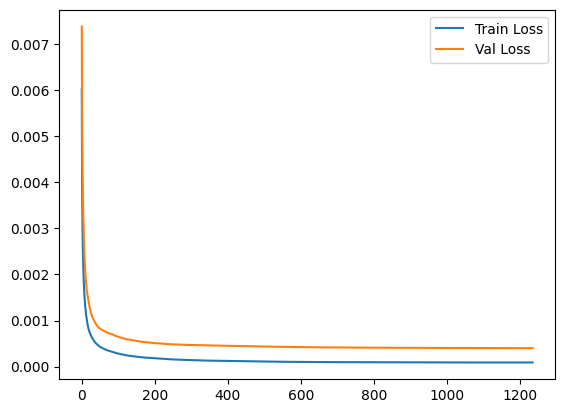

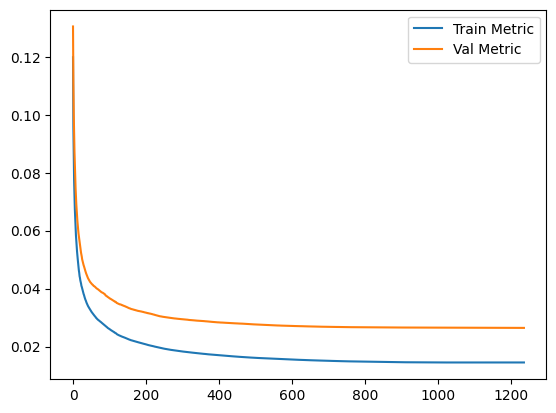

Fold 5 of 6 completed
Train Loss: 9.05636100271839e-05
Train Metric: 0.01449911024009729
Val Loss: 0.00040467623136566656
Val Metric: 0.02650550613029733


Epochs:  28%|██▊       | 2785/10000 [05:27<14:08,  8.51it/s]


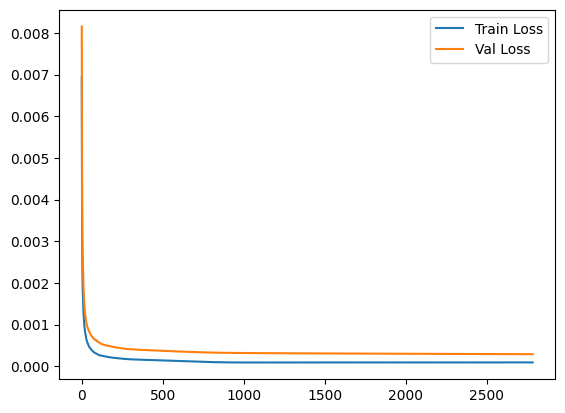

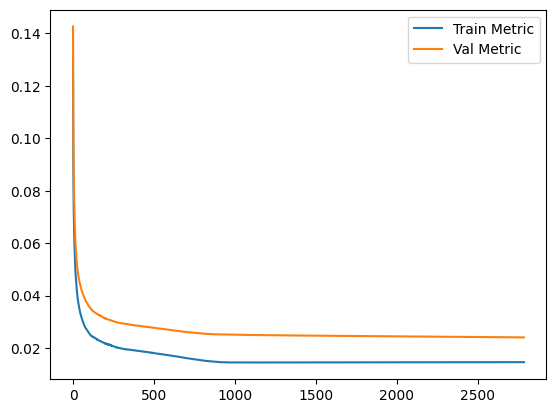

Fold 6 of 6 completed
Train Loss: 9.141456946444132e-05
Train Metric: 0.014617240568229313
Val Loss: 0.0002918094486806092
Val Metric: 0.02418656677209654
Combination: [32, 32, 32, 3] ReLU Range_random (-0.5, 0.5) L2 1e-08 ('Standard', 0.9) 0.01
Statistics: {'tr_loss': 9.646628126833998e-05, 'tr_metric': 0.014898976683321678, 'val_loss': 0.00032012103335954807, 'val_metric': 0.024384427544536024}




Combination: [32, 32, 32, 3] ReLU Range_random (-0.1, 0.1) L2 1e-08 ('Nesterov', 0.9) 0.01


Epochs:  12%|█▏        | 1235/10000 [02:41<19:03,  7.66it/s]


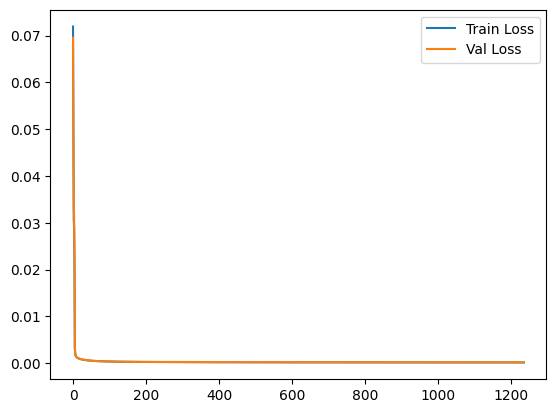

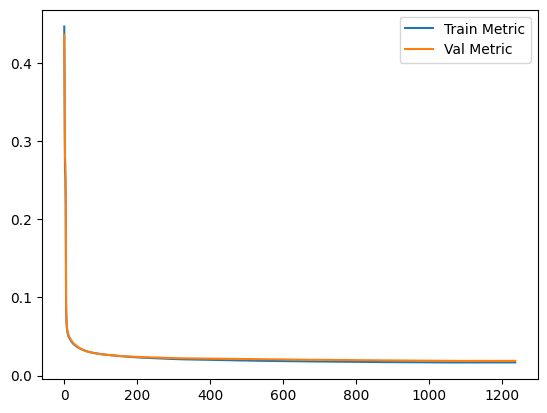

Fold 1 of 6 completed
Train Loss: 0.0001209867552967882
Train Metric: 0.016744780434680192
Val Loss: 0.00016078787829173366
Val Metric: 0.018848159669094332


Epochs:  12%|█▏        | 1174/10000 [02:30<18:52,  7.79it/s]


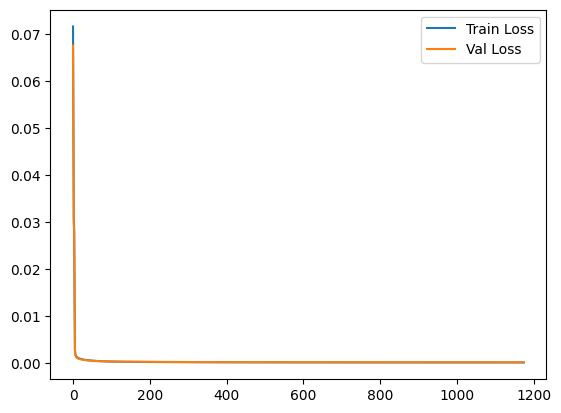

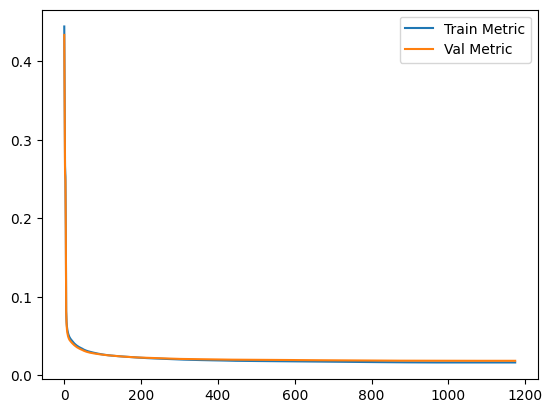

Fold 2 of 6 completed
Train Loss: 0.00011965865769780812
Train Metric: 0.01655269344968096
Val Loss: 0.0001586722483465003
Val Metric: 0.01866143988921159


Epochs:  12%|█▏        | 1203/10000 [02:35<18:55,  7.74it/s]


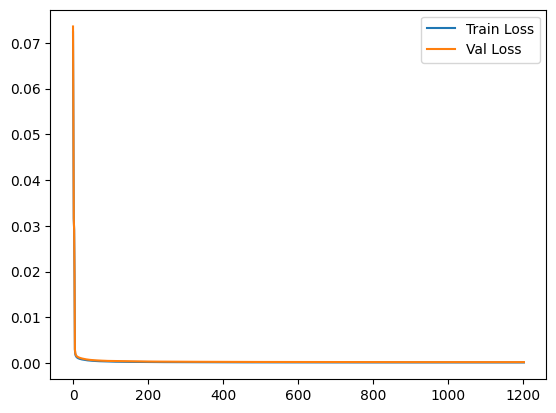

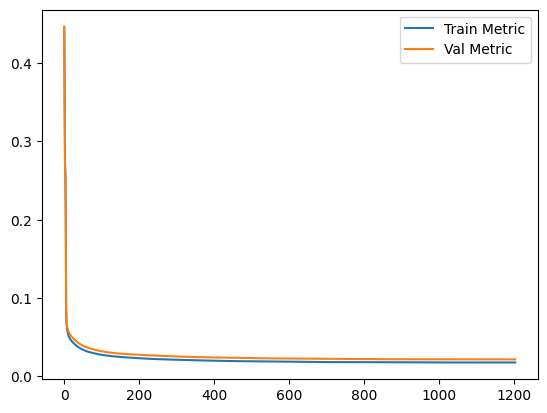

Fold 3 of 6 completed
Train Loss: 0.00014368626895883268
Train Metric: 0.017925329021745255
Val Loss: 0.00021916494939400123
Val Metric: 0.02177311189458215


Epochs:  12%|█▏        | 1188/10000 [02:32<18:54,  7.77it/s]


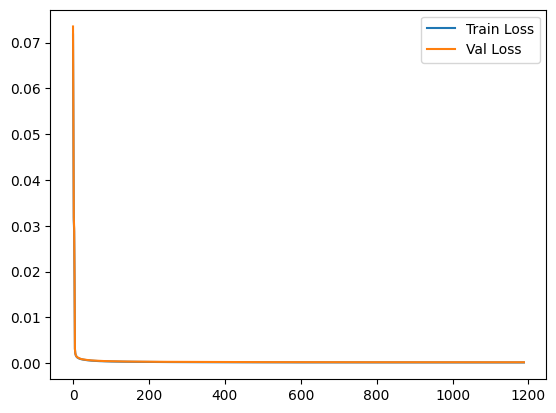

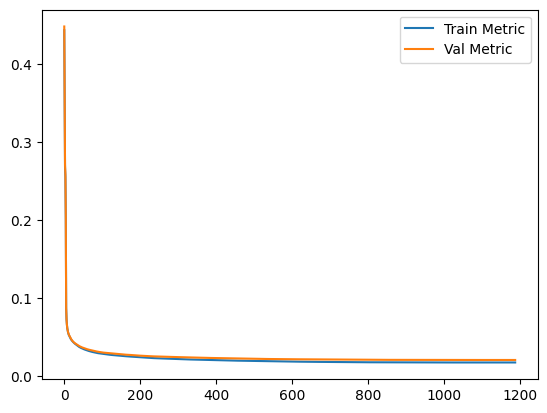

Fold 4 of 6 completed
Train Loss: 0.00013513460968453373
Train Metric: 0.017110148649641454
Val Loss: 0.00018204724829722115
Val Metric: 0.020226403816990327


Epochs:  11%|█▏        | 1142/10000 [02:27<19:00,  7.77it/s]


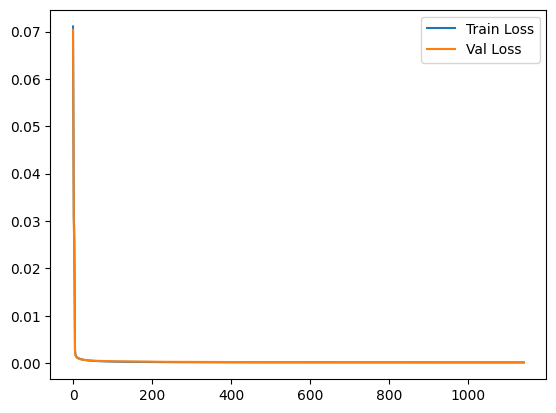

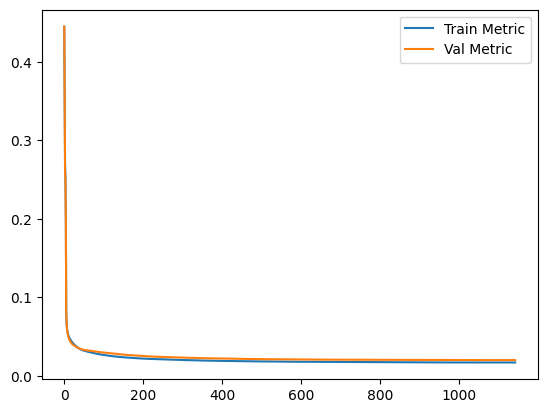

Fold 5 of 6 completed
Train Loss: 0.00013277374593059982
Train Metric: 0.017260934519130307
Val Loss: 0.00019077497991737625
Val Metric: 0.020312898261959384


Epochs:  12%|█▏        | 1184/10000 [02:32<18:56,  7.76it/s]


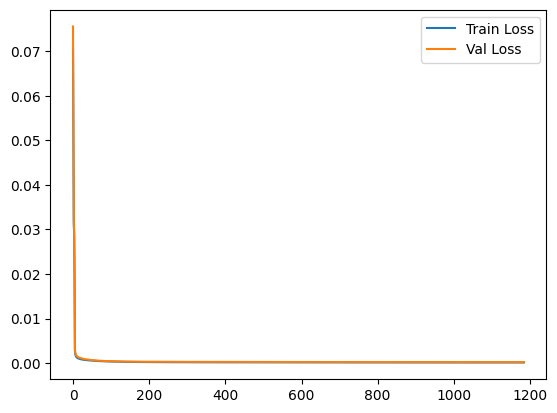

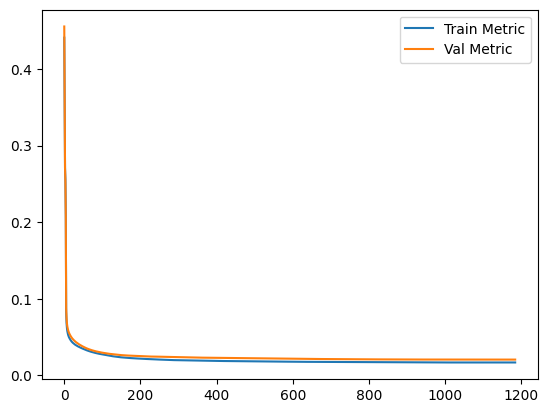

Fold 6 of 6 completed
Train Loss: 0.00012680347434368183
Train Metric: 0.016946787333934663
Val Loss: 0.0002086013026280734
Val Metric: 0.020691358053373025
Combination: [32, 32, 32, 3] ReLU Range_random (-0.1, 0.1) L2 1e-08 ('Nesterov', 0.9) 0.01
Statistics: {'tr_loss': 0.0001298405853187074, 'tr_metric': 0.017090112234802137, 'val_loss': 0.00018667476781248434, 'val_metric': 0.020085561930868464}




Combination: [32, 32, 32, 3] ReLU Range_random (-0.1, 0.1) L2 1e-08 ('Standard', 0.9) 0.01


Epochs:  13%|█▎        | 1253/10000 [02:27<17:06,  8.52it/s]


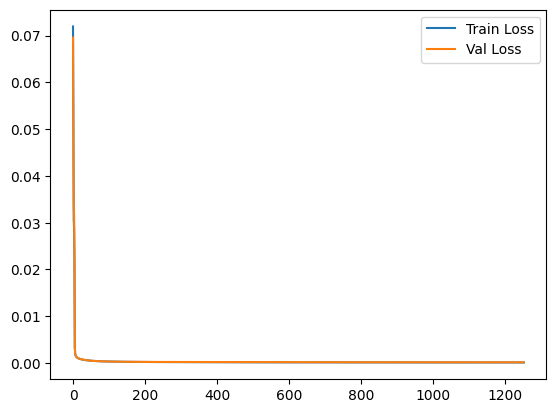

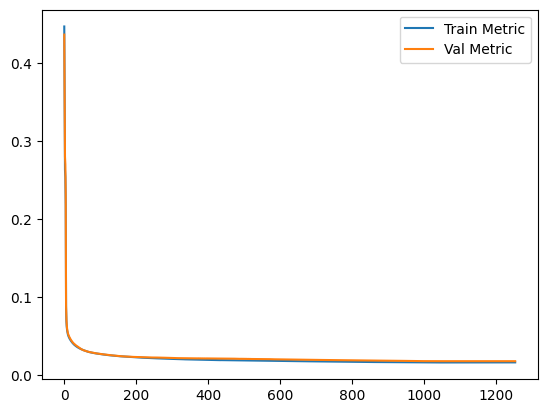

Fold 1 of 6 completed
Train Loss: 0.00012010509942491055
Train Metric: 0.016637513149846104
Val Loss: 0.00015564063427227163
Val Metric: 0.01833359426727555


Epochs:  12%|█▏        | 1184/10000 [02:18<17:11,  8.55it/s]


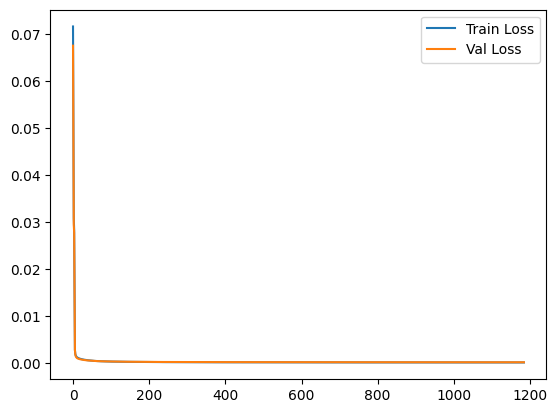

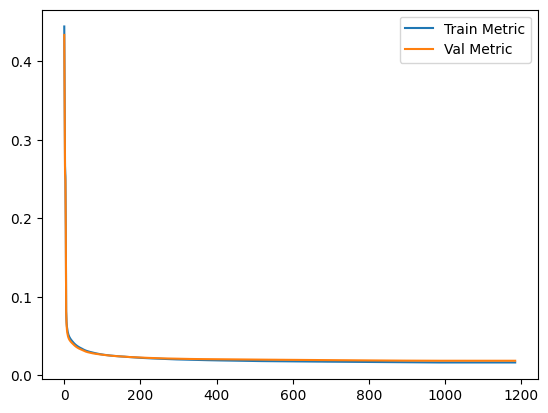

Fold 2 of 6 completed
Train Loss: 0.00012028289927530598
Train Metric: 0.01657427413168754
Val Loss: 0.00016467782471960306
Val Metric: 0.01876184945784263


Epochs:  12%|█▏        | 1178/10000 [02:19<17:21,  8.47it/s]


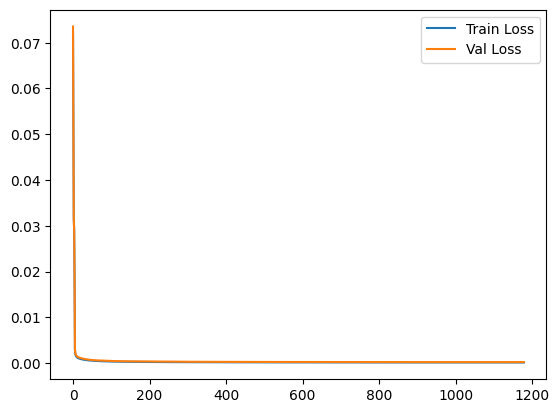

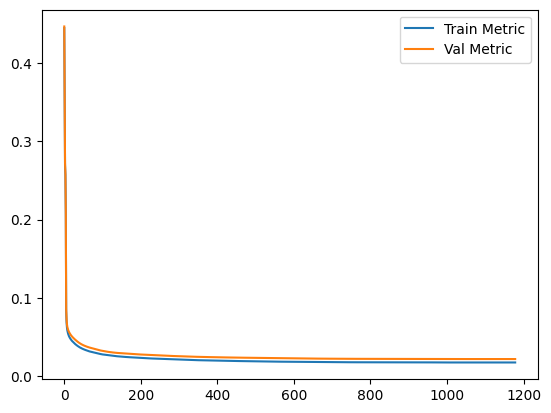

Fold 3 of 6 completed
Train Loss: 0.0001338843210139093
Train Metric: 0.01730739150554734
Val Loss: 0.00021819686038090152
Val Metric: 0.02162443641684821


Epochs:  12%|█▏        | 1169/10000 [02:17<17:18,  8.51it/s]


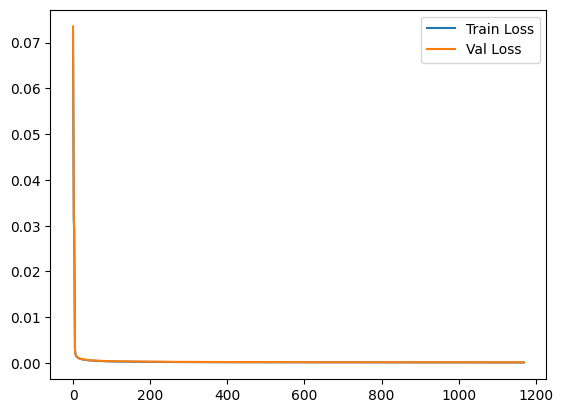

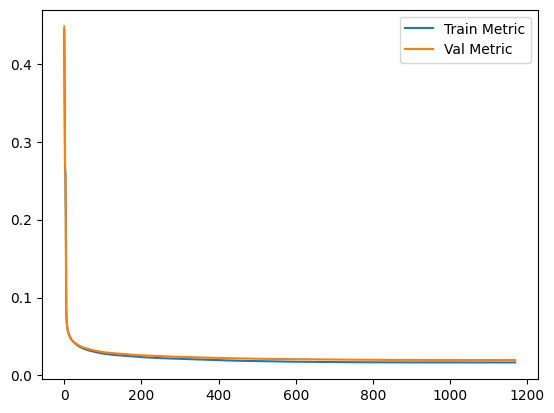

Fold 4 of 6 completed
Train Loss: 0.00012707959258484984
Train Metric: 0.01666514605707201
Val Loss: 0.00016780158641948646
Val Metric: 0.019784298272855824


Epochs:  12%|█▏        | 1189/10000 [02:19<17:15,  8.51it/s]


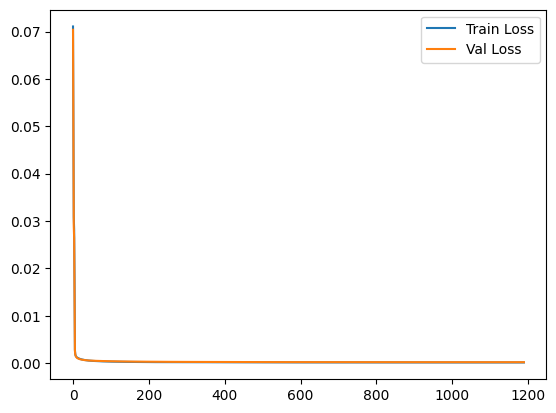

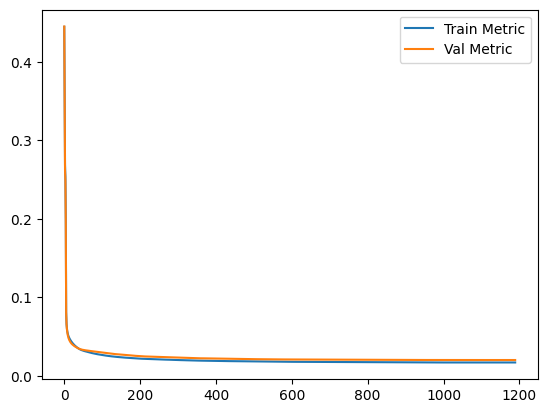

Fold 5 of 6 completed
Train Loss: 0.00013229667614954004
Train Metric: 0.01722687021524945
Val Loss: 0.00019181248698345348
Val Metric: 0.020372264727281666


Epochs:  12%|█▏        | 1190/10000 [02:21<17:24,  8.43it/s]


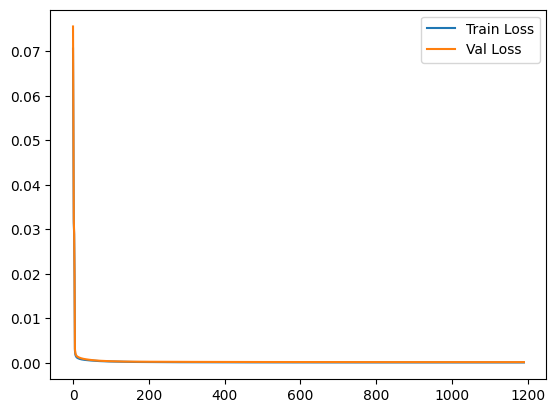

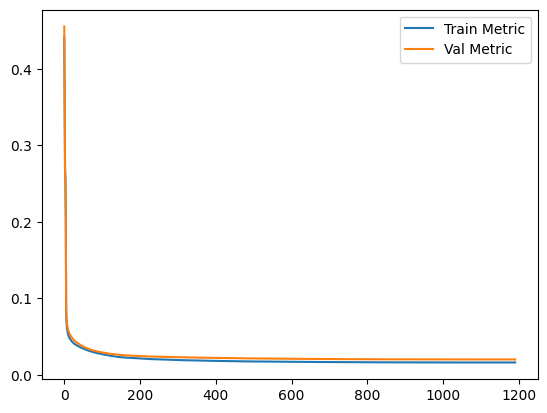

Fold 6 of 6 completed
Train Loss: 0.0001187959859358074
Train Metric: 0.016423771371325203
Val Loss: 0.00019895834669226686
Val Metric: 0.020383057057272738
Combination: [32, 32, 32, 3] ReLU Range_random (-0.1, 0.1) L2 1e-08 ('Standard', 0.9) 0.01
Statistics: {'tr_loss': 0.00012540742906405386, 'tr_metric': 0.01680582773845461, 'val_loss': 0.00018284795657799716, 'val_metric': 0.01987658336656277}




Combination: [64, 64, 3] ReLU Range_random (-0.5, 0.5) L2 1e-08 ('Nesterov', 0.9) 0.01


Epochs:  12%|█▏        | 1199/10000 [02:22<17:27,  8.40it/s]


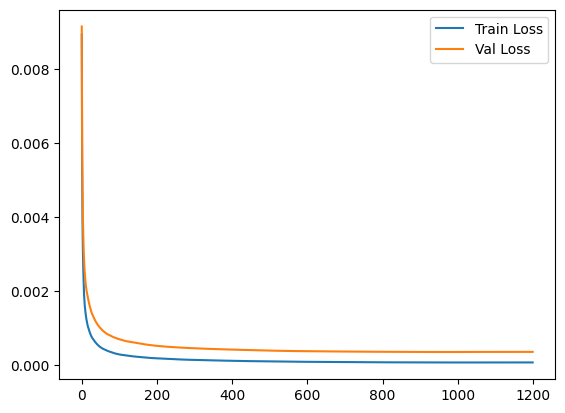

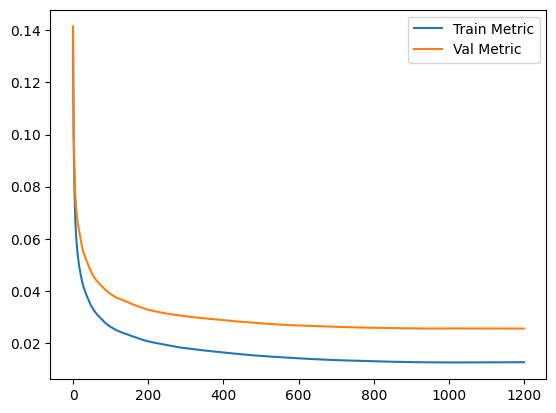

Fold 1 of 6 completed
Train Loss: 6.670079202895941e-05
Train Metric: 0.012631416428993285
Val Loss: 0.00034891323676784303
Val Metric: 0.025591099374131697


Epochs:  11%|█         | 1100/10000 [02:11<17:43,  8.37it/s]


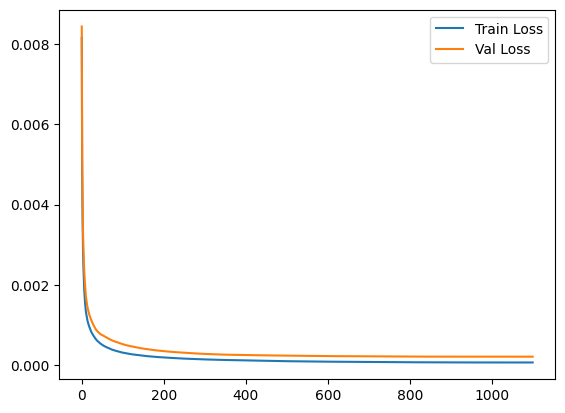

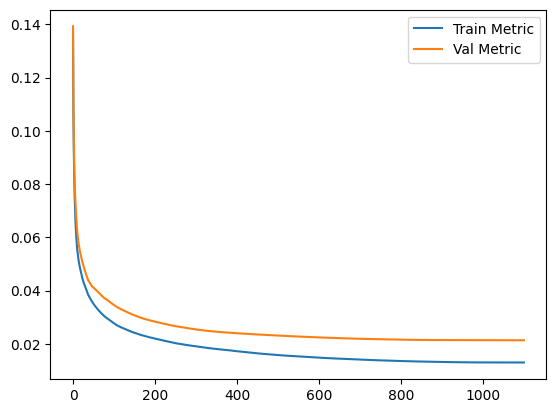

Fold 2 of 6 completed
Train Loss: 7.273934616267328e-05
Train Metric: 0.013322498836968297
Val Loss: 0.00021454273765005196
Val Metric: 0.02144866117035823


Epochs:  43%|████▎     | 4254/10000 [08:26<11:24,  8.40it/s]


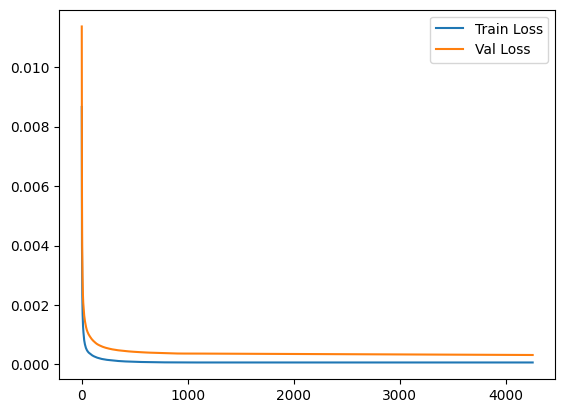

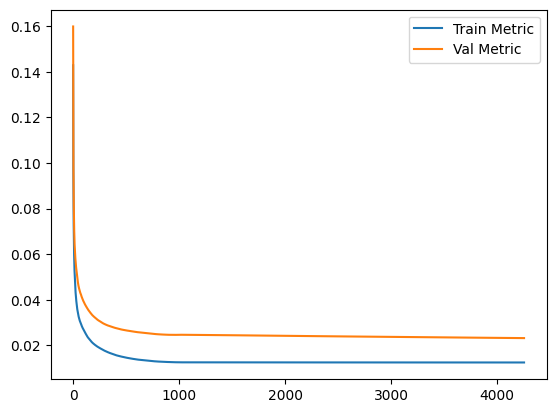

Fold 3 of 6 completed
Train Loss: 6.660813047002855e-05
Train Metric: 0.012542640014633044
Val Loss: 0.00032139001873221013
Val Metric: 0.02332629255852576


Epochs:  15%|█▍        | 1487/10000 [02:55<16:44,  8.47it/s]


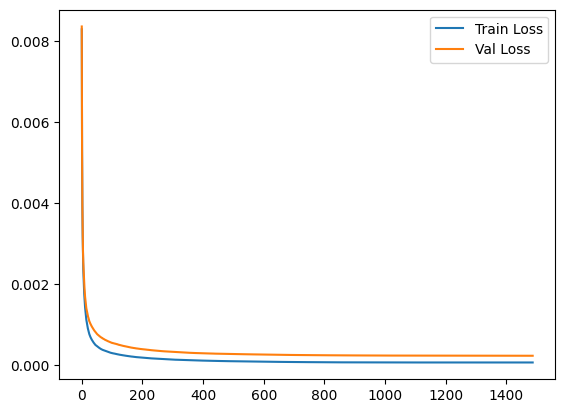

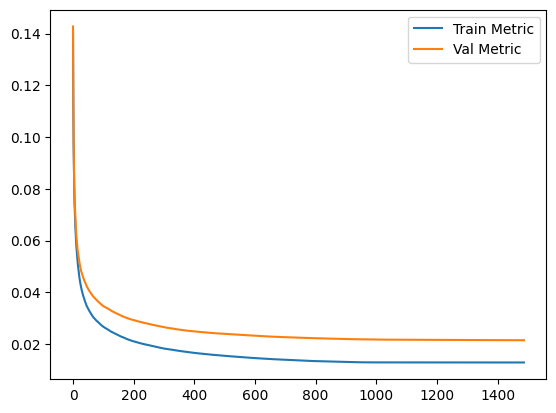

Fold 4 of 6 completed
Train Loss: 7.004190231053719e-05
Train Metric: 0.012917943119537598
Val Loss: 0.00023822751373418695
Val Metric: 0.021612087539524708


Epochs:  23%|██▎       | 2311/10000 [04:37<15:21,  8.34it/s]


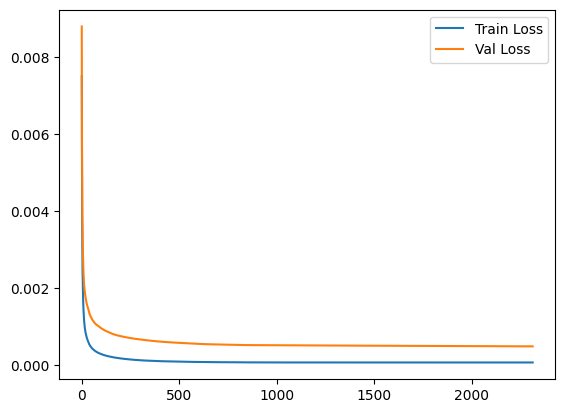

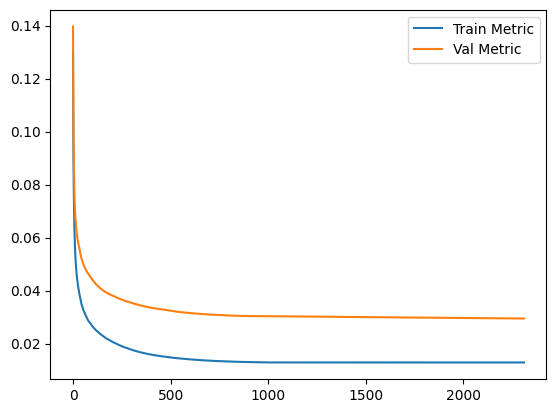

Fold 5 of 6 completed
Train Loss: 6.990457086207701e-05
Train Metric: 0.012892792471642682
Val Loss: 0.0004932471029821115
Val Metric: 0.029641083846117088


Epochs:  13%|█▎        | 1276/10000 [02:33<17:32,  8.29it/s]


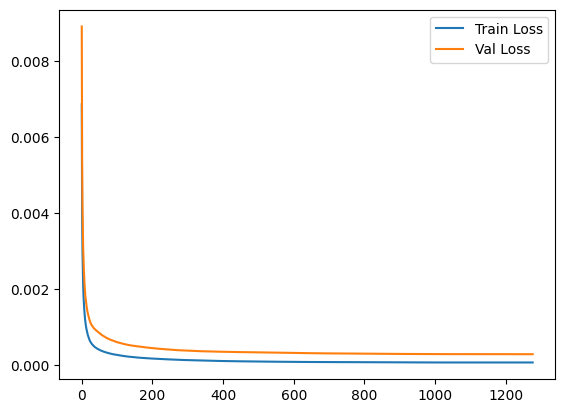

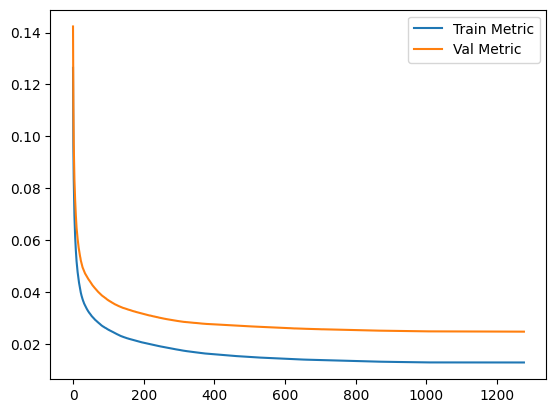

Fold 6 of 6 completed
Train Loss: 7.004505698802562e-05
Train Metric: 0.012871374814992028
Val Loss: 0.0002898446963151528
Val Metric: 0.02483648021407977
Combination: [64, 64, 3] ReLU Range_random (-0.5, 0.5) L2 1e-08 ('Nesterov', 0.9) 0.01
Statistics: {'tr_loss': 6.933996647038351e-05, 'tr_metric': 0.012863110947794488, 'val_loss': 0.00031769421769692606, 'val_metric': 0.024409284117122874}




Combination: [64, 64, 3] ReLU Range_random (-0.5, 0.5) L2 1e-08 ('Standard', 0.9) 0.01


Epochs:  31%|███       | 3113/10000 [05:39<12:31,  9.16it/s]


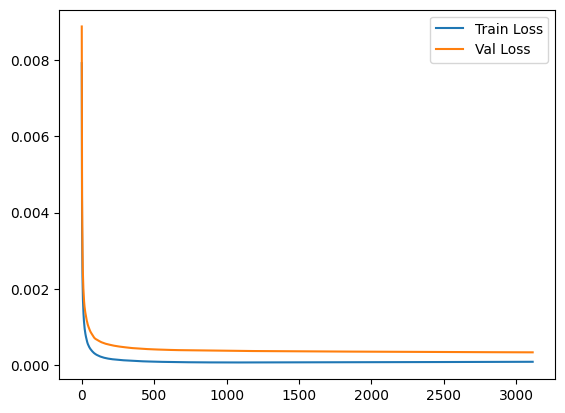

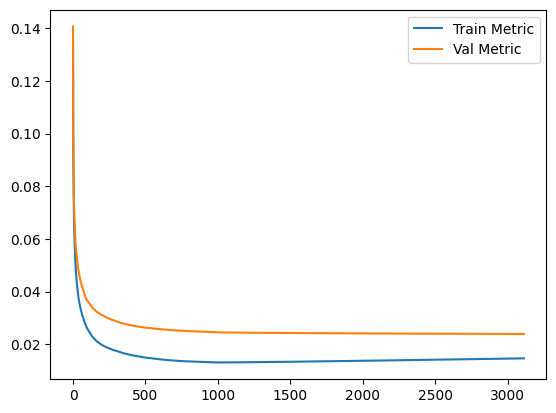

Fold 1 of 6 completed
Train Loss: 8.843677608679148e-05
Train Metric: 0.014463095690525266
Val Loss: 0.00034164595956486546
Val Metric: 0.023974758811391737


Epochs:  46%|████▌     | 4573/10000 [08:10<09:42,  9.32it/s]


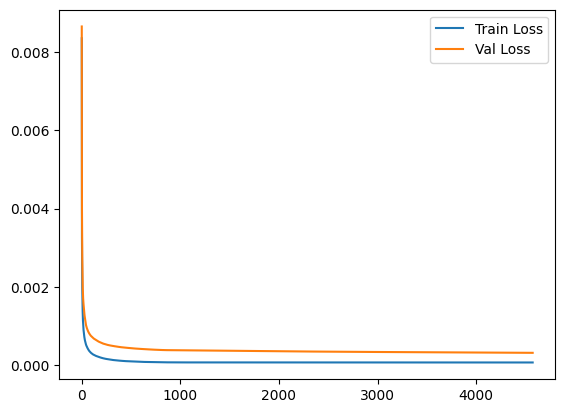

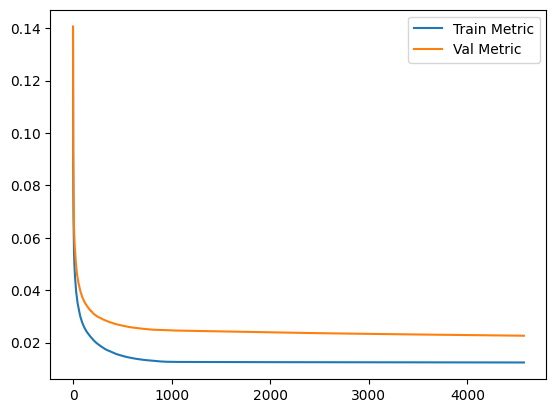

Fold 2 of 6 completed
Train Loss: 6.499294310512113e-05
Train Metric: 0.01242191974060069
Val Loss: 0.0003148180002601527
Val Metric: 0.022725071954762425


Epochs:  12%|█▏        | 1198/10000 [02:10<15:57,  9.19it/s]


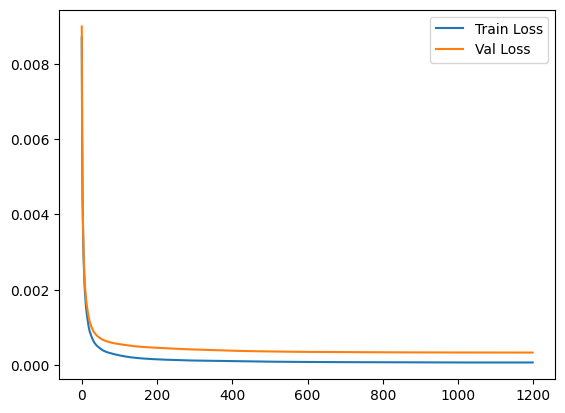

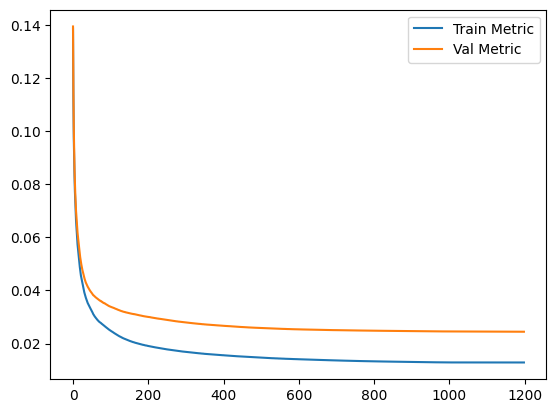

Fold 3 of 6 completed
Train Loss: 7.08678482257032e-05
Train Metric: 0.01296774266294836
Val Loss: 0.00033550792797247623
Val Metric: 0.02461564161960232


Epochs:  30%|██▉       | 2951/10000 [05:17<12:38,  9.29it/s]


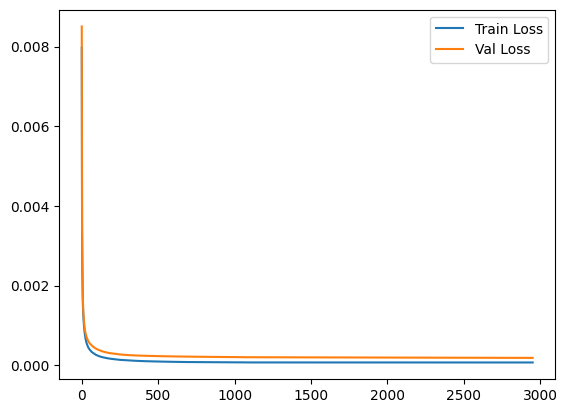

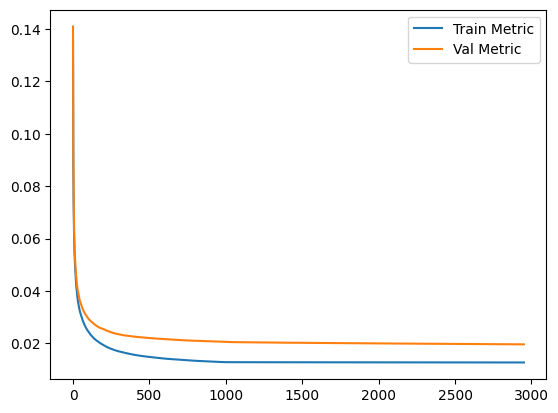

Fold 4 of 6 completed
Train Loss: 6.75535097606718e-05
Train Metric: 0.012710158815194671
Val Loss: 0.00018470515876599527
Val Metric: 0.019707035635145396


Epochs:  46%|████▋     | 4648/10000 [08:22<09:38,  9.25it/s]


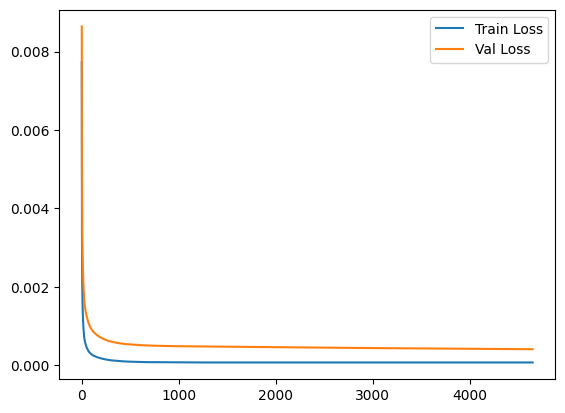

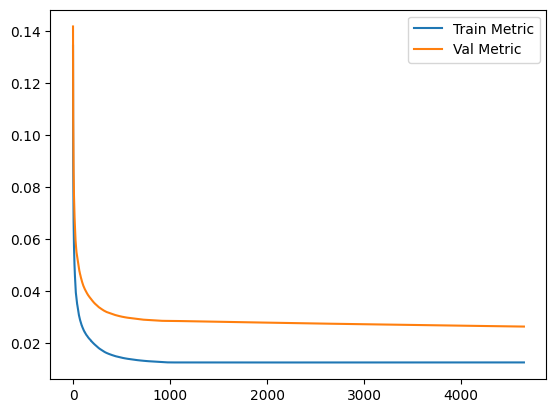

Fold 5 of 6 completed
Train Loss: 6.728561939867982e-05
Train Metric: 0.012629313603149032
Val Loss: 0.00040912493110111404
Val Metric: 0.026540737119835088


Epochs:  44%|████▍     | 4388/10000 [07:56<10:09,  9.20it/s]


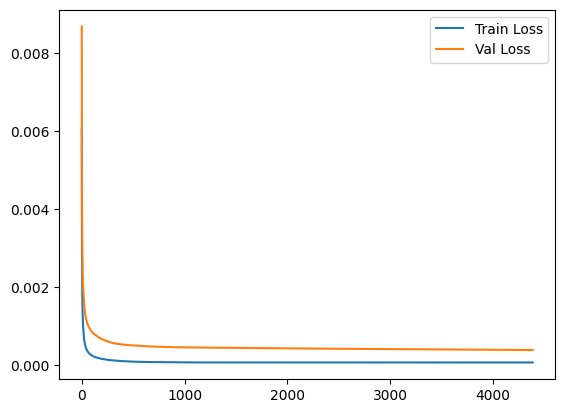

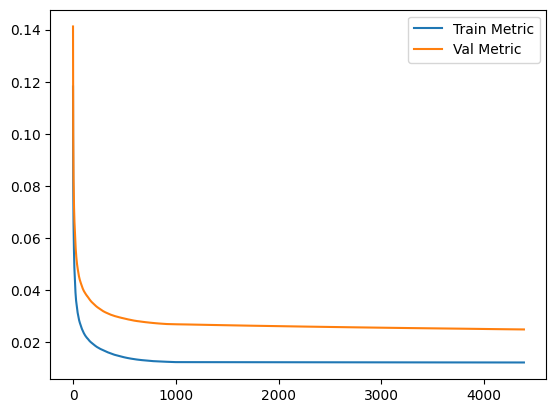

Fold 6 of 6 completed
Train Loss: 6.19486694332367e-05
Train Metric: 0.012165826668543064
Val Loss: 0.00038426670432098616
Val Metric: 0.024953215897034614
Combination: [64, 64, 3] ReLU Range_random (-0.5, 0.5) L2 1e-08 ('Standard', 0.9) 0.01
Statistics: {'tr_loss': 7.018089433503403e-05, 'tr_metric': 0.012893009530160182, 'val_loss': 0.0003283447803309316, 'val_metric': 0.023752743506295262}




Combination: [64, 64, 3] ReLU Range_random (-0.1, 0.1) L2 1e-08 ('Nesterov', 0.9) 0.01


Epochs:  12%|█▏        | 1158/10000 [02:20<17:51,  8.26it/s]


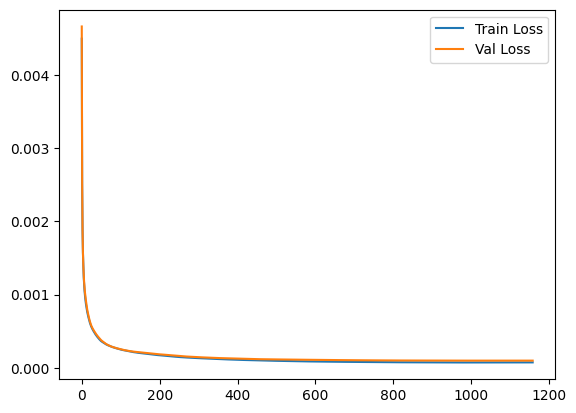

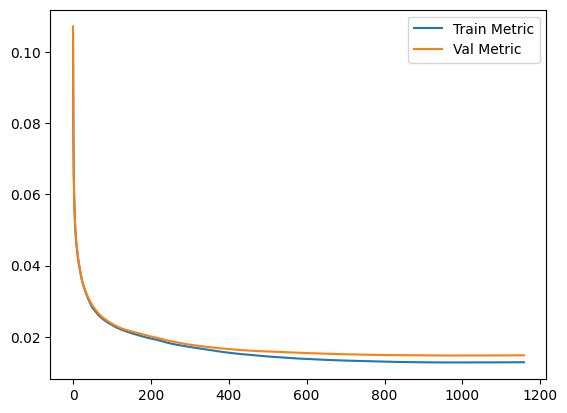

Fold 1 of 6 completed
Train Loss: 7.404964665882903e-05
Train Metric: 0.012814596591013068
Val Loss: 9.901854159264299e-05
Val Metric: 0.014745783295647671


Epochs:  11%|█         | 1082/10000 [02:09<17:44,  8.38it/s]


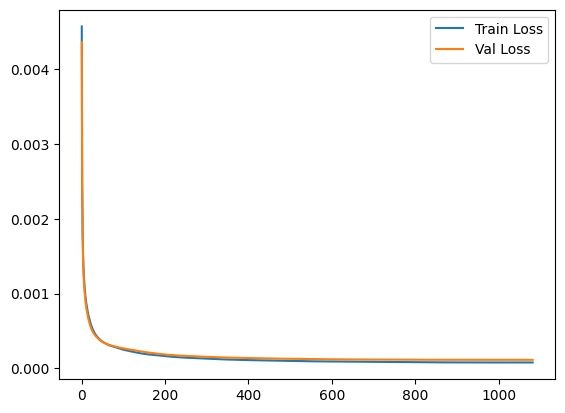

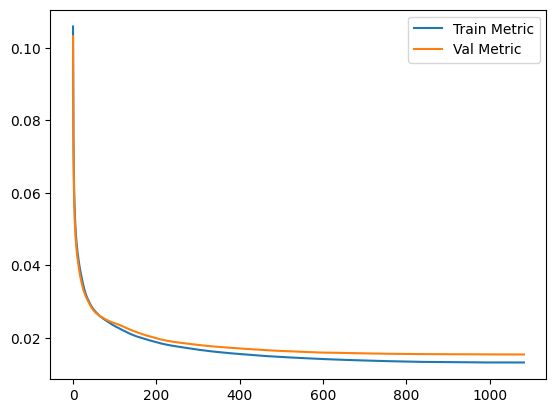

Fold 2 of 6 completed
Train Loss: 8.051733752643909e-05
Train Metric: 0.013338386081391035
Val Loss: 0.000114899036718995
Val Metric: 0.015474229395078245


Epochs:  12%|█▏        | 1193/10000 [02:22<17:32,  8.37it/s]


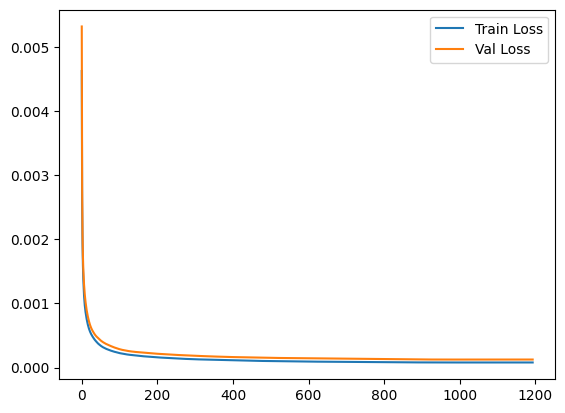

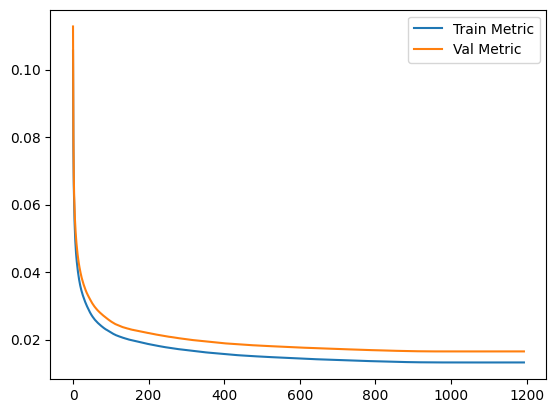

Fold 3 of 6 completed
Train Loss: 7.93538286056698e-05
Train Metric: 0.013219181073033015
Val Loss: 0.00012487582377453086
Val Metric: 0.016477864767329643


Epochs:  12%|█▏        | 1161/10000 [02:18<17:32,  8.40it/s]


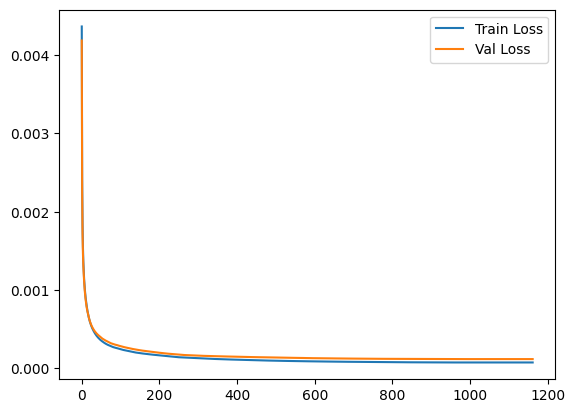

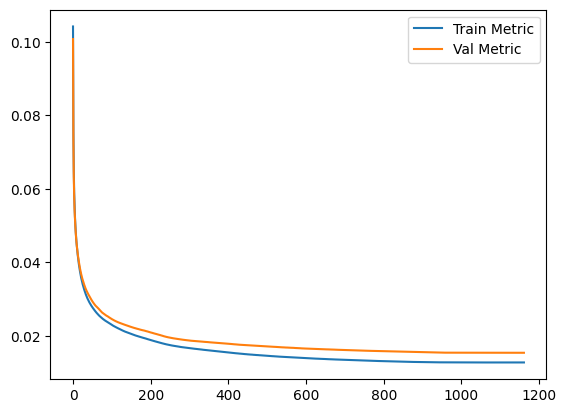

Fold 4 of 6 completed
Train Loss: 7.601832855170043e-05
Train Metric: 0.012872305717671886
Val Loss: 0.00011843026411570751
Val Metric: 0.015539928449132078


Epochs:  12%|█▏        | 1199/10000 [02:24<17:37,  8.32it/s]


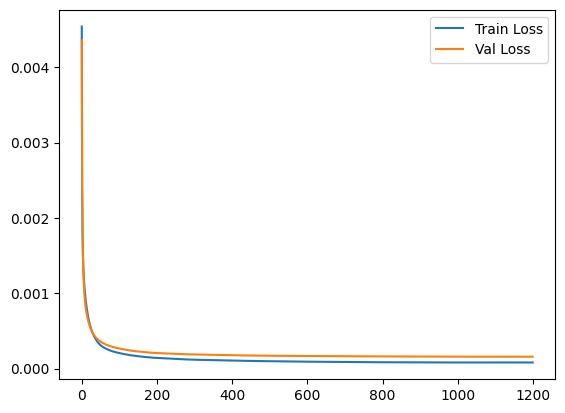

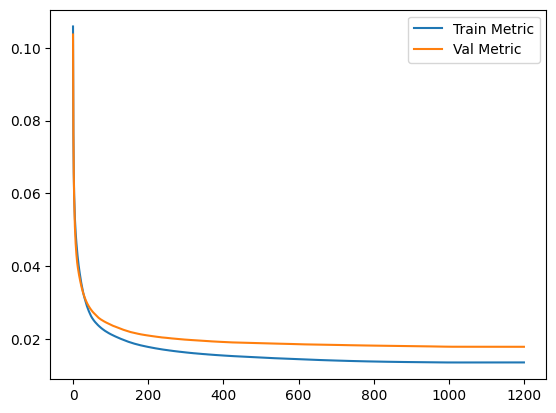

Fold 5 of 6 completed
Train Loss: 8.2117952385913e-05
Train Metric: 0.013628272208971637
Val Loss: 0.00015980514477741253
Val Metric: 0.01799033949851006


Epochs:  12%|█▏        | 1212/10000 [02:24<17:26,  8.40it/s]


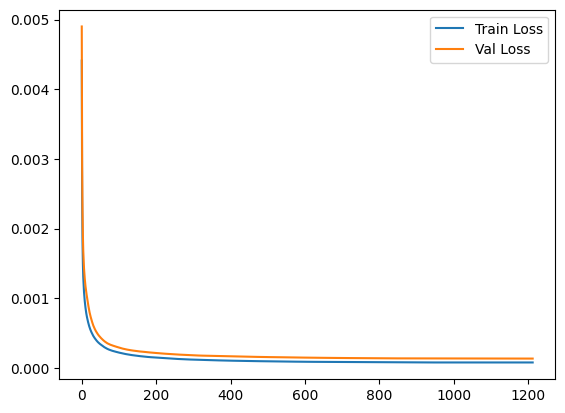

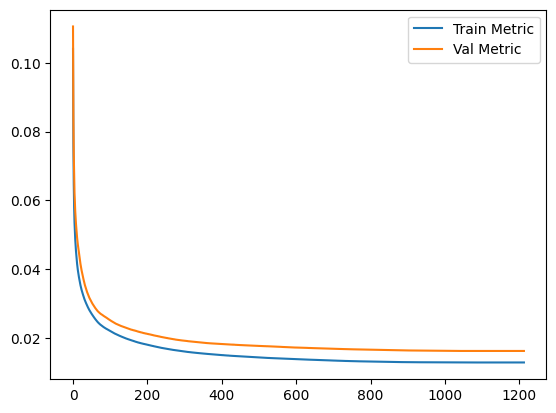

Fold 6 of 6 completed
Train Loss: 7.641733691509102e-05
Train Metric: 0.01298660931329969
Val Loss: 0.0001331113942572639
Val Metric: 0.01633748853769179
Combination: [64, 64, 3] ReLU Range_random (-0.1, 0.1) L2 1e-08 ('Nesterov', 0.9) 0.01
Statistics: {'tr_loss': 7.807907177394041e-05, 'tr_metric': 0.013143225164230055, 'val_loss': 0.00012502336753942545, 'val_metric': 0.016094272323898248}




Combination: [64, 64, 3] ReLU Range_random (-0.1, 0.1) L2 1e-08 ('Standard', 0.9) 0.01


Epochs:  11%|█▏        | 1142/10000 [02:03<15:54,  9.28it/s]


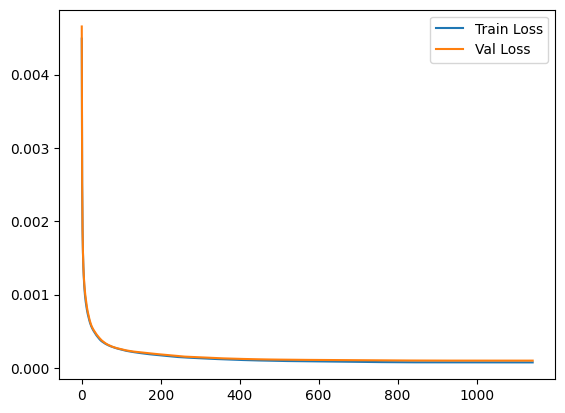

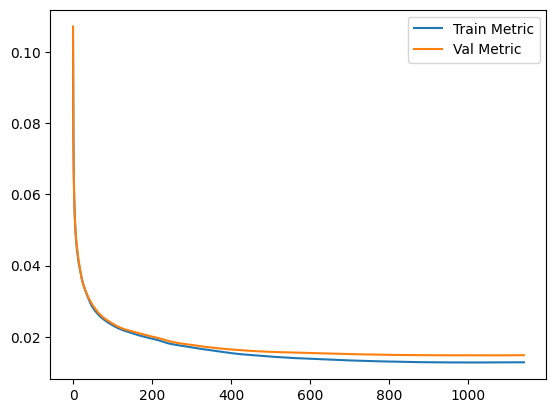

Fold 1 of 6 completed
Train Loss: 7.516725106335729e-05
Train Metric: 0.012871574667876529
Val Loss: 0.00010002877511588131
Val Metric: 0.014842454304312795


Epochs:  12%|█▏        | 1164/10000 [02:04<15:44,  9.36it/s]


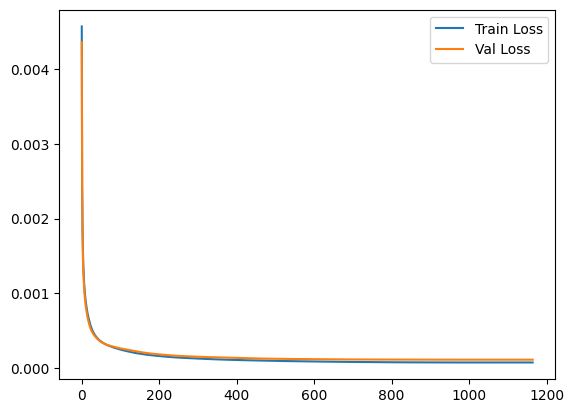

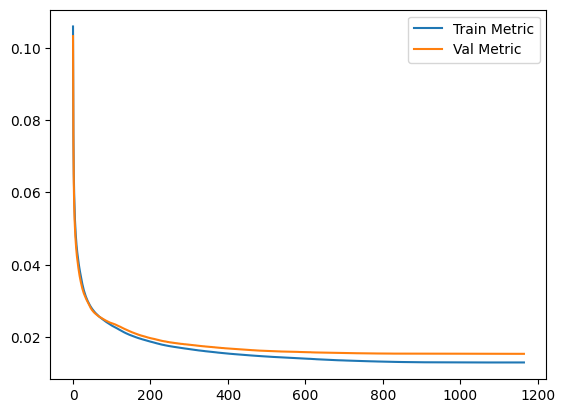

Fold 2 of 6 completed
Train Loss: 7.701030410507211e-05
Train Metric: 0.013033026987109944
Val Loss: 0.00011431104485365148
Val Metric: 0.01542014252883697


Epochs:  11%|█▏        | 1147/10000 [02:02<15:48,  9.34it/s]


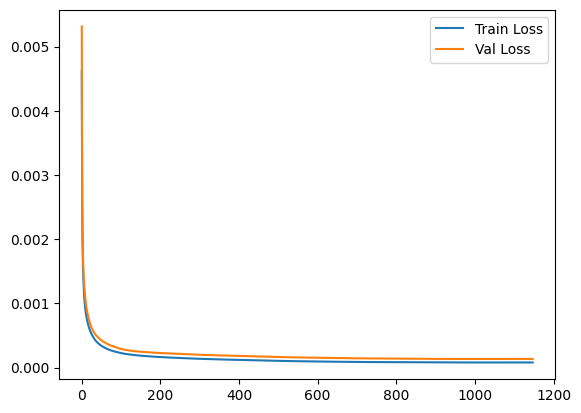

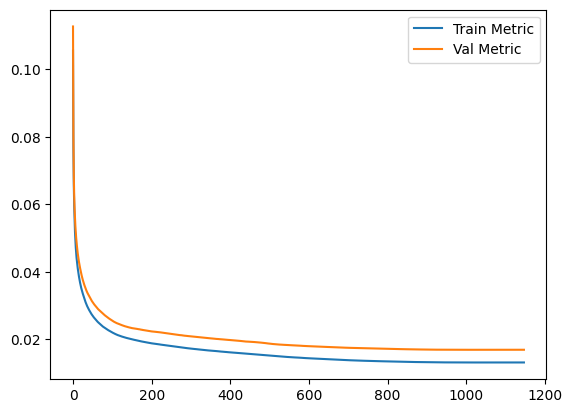

Fold 3 of 6 completed
Train Loss: 7.920878464431219e-05
Train Metric: 0.013230467897945675
Val Loss: 0.00013403456417289354
Val Metric: 0.016974721858038687


Epochs:  12%|█▏        | 1192/10000 [02:07<15:39,  9.38it/s]


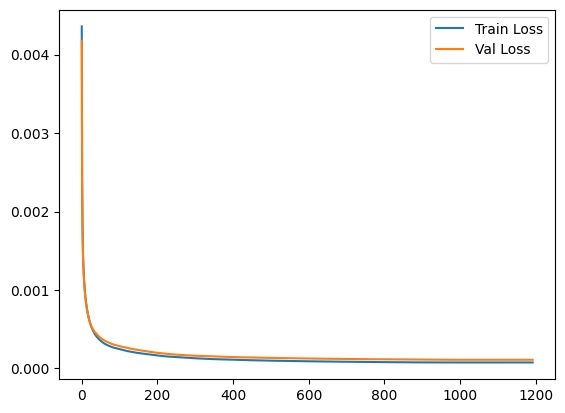

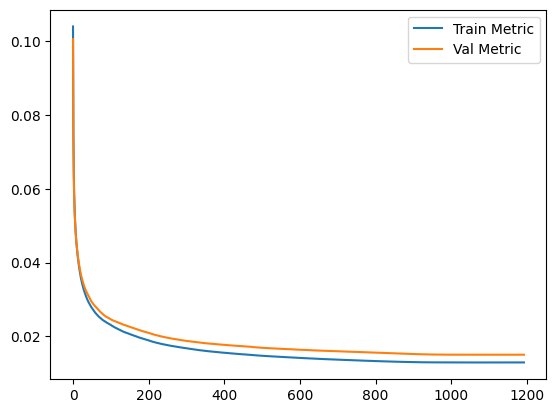

Fold 4 of 6 completed
Train Loss: 7.680370160060056e-05
Train Metric: 0.012946071760837029
Val Loss: 0.00011115636990904429
Val Metric: 0.015083176945829455


Epochs:  12%|█▏        | 1223/10000 [02:12<15:47,  9.26it/s]


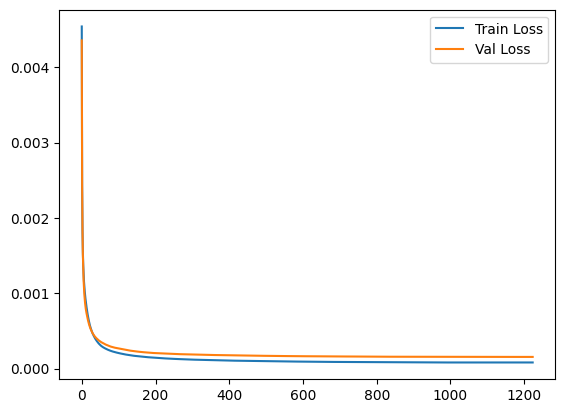

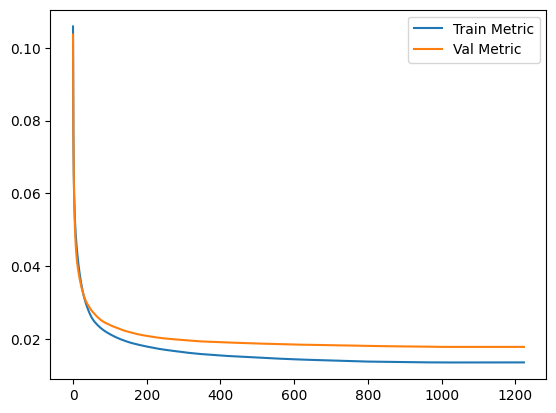

Fold 5 of 6 completed
Train Loss: 8.146890542418379e-05
Train Metric: 0.013578826595424661
Val Loss: 0.00015559345657860369
Val Metric: 0.017884229745921004


Epochs:  12%|█▏        | 1215/10000 [02:11<15:51,  9.23it/s]


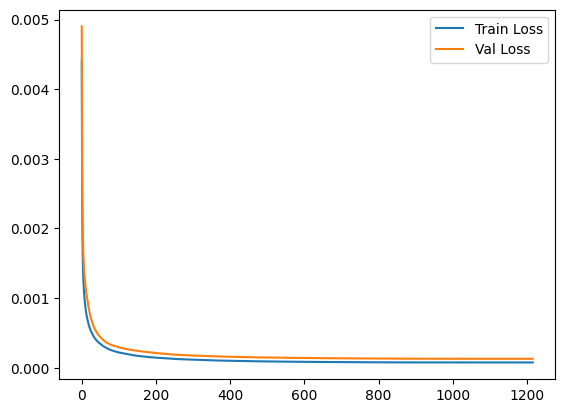

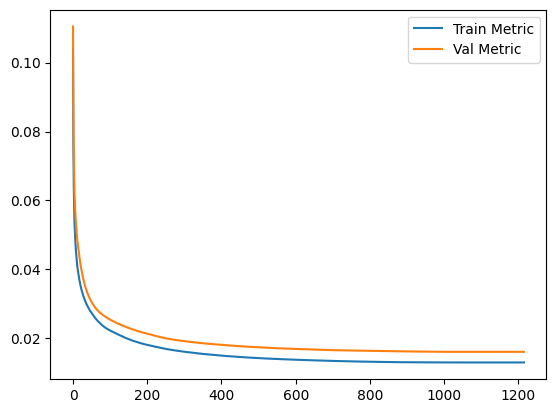

Fold 6 of 6 completed
Train Loss: 7.538343508163074e-05
Train Metric: 0.012970429022803969
Val Loss: 0.00012888785976321584
Val Metric: 0.016078194720627555
Combination: [64, 64, 3] ReLU Range_random (-0.1, 0.1) L2 1e-08 ('Standard', 0.9) 0.01
Statistics: {'tr_loss': 7.750706365319277e-05, 'tr_metric': 0.013105066155332969, 'val_loss': 0.00012400201173221504, 'val_metric': 0.01604715335059441}






In [4]:
hyperparameters = {
    'layers_sizes': [[32, 32, 3], [32, 32, 32, 3], [64, 64, 3]],
    'activations': ["ReLU"], 
    'startings': ["Range_random"],
    'startings_range': [(-0.5, 0.5), (-0.1, 0.1)],
    'regularizers': ["L2"],
    'regularizers_lambda': [1e-8],
    'momentums': [('Nesterov', 0.9), ('Standard', 0.9)],
    'etas': [1e-2],
}

data_to_csv = grid_search(
    hyperparams=hyperparameters,
    X=X_train,
    y=y_train,
    k=6,
    metric=MEE(),
    loss=MSE(1),
    seed=6,
    verbose=True
)

In [ ]:
X_train, y_train, test = read_cup("../data/ML-CUP23-TR.csv", "../data/ML-CUP23-TS.csv")

In [ ]:
# reshape ytrain eliminating last shape
y_train = y_train.reshape(y_train.shape[0], y_train.shape[1])
y_train.shape

In [ ]:
# reshape Xtrain eliminating last shape
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1])
X_train.shape

In [ ]:
# use scikit-lear to make regression in 3d
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(
    hidden_layer_sizes=(32,32),
    activation='relu',
    solver='sgd',
    alpha=0,
    batch_size=1,
    learning_rate_init=1e-3,
    max_iter=2500,
    shuffle=True,
    random_state=6,
    verbose=True,
    momentum=0,
    beta_1= 0,
    beta_2= 0.,
    epsilon= 1,
    validation_fraction = 0,
    nesterovs_momentum=False
)

mlp.fit(X_train, y_train)
# print the learning curve
plt.plot(mlp.loss_curve_)
plt.show()

# print the mean error
print(MEE()(y_train, mlp.predict(X_train)))

In [ ]:
import itertools

# Define the hyperparameters as dictionaries
hyperparameters = {
    'losses': ["MSE"],
    'layers_sizes': [[32,32,3],[16,16,16,3]],
    'activations': ["ReLU"], 
    'startings': ["Range_random"],
    'startings_range': [(-0.5, 0.5)],
    'regularizers': ["L2"],
    'regularizers_lambda': [1e-6, 1e-8],
    'momentums': [('Nesterov', 1e-4), ('Standard', 1e-4)],
    'etas': [1e-4]
}

# Create a list of all the possible combinations using itertools.product
hyperparameter_combinations = list(itertools.product(*hyperparameters.values()))

all_dics = []
# Print the result or use it as needed
for combination in hyperparameter_combinations:
    hyperparameter_dict = dict(zip(hyperparameters.keys(), combination))
    print(hyperparameter_dict)
    all_dics.append(hyperparameter_dict)

In [ ]:
for i in all_dics:
    print(*i.values())

In [ ]:
losses_ = "MSE"

startings_ = []
startings_range_ = []
activations_ = []
regularizers_ = []
regularizers_lambda_ = []
momentums_ = []


for combination in all_dics:
    layers_sizes_ = combination['layers_sizes']
    startings_ = []
    activations_ = []
    regularizers_ = []
    regularizers_lambda_ = []
    momentums_ = []
    startings_range_ = []
    etas_ = combination['etas']
    for i in range(len(combination['layers_sizes'])):
        activations_.append(combination['activations'] if i != len(layers_sizes_)-1 else "Identity")
        startings_.append(combination['startings'])
        startings_range_.append(combination['startings_range'])
        regularizers_.append(combination['regularizers'])
        regularizers_lambda_.append(combination['regularizers_lambda'])
        momentums_.append(combination['momentums'])
    
    print(layers_sizes_)
    print(activations_)
    print(startings_)
    print(startings_range_)
    print(regularizers_)
    print(regularizers_lambda_)
    print(momentums_)
    print(etas_)
    print("\n")

In [ ]:
data_to_csv = [["Loss func","Size", "Activation", "Starting", "Range", "Regularizer", "lambda", "Momentum", "Eta", "tLoss", "tMetric", "vLoss", "vMetric"]]

In [ ]:
seed = 3
data_to_csv = [[]]
losses_ = "MSE"

for combination in all_dics:
    layers_sizes_ = combination['layers_sizes']
    activations_ = []
    startings_ = []
    startings_range_ = []
    regularizers_ = []
    regularizers_lambda_ = []
    momentums_ = []
    etas_ = combination['etas']
    for i in range(len(combination['layers_sizes'])):
        activations_.append(combination['activations'] if i != len(layers_sizes_)-1 else "Identity")
        startings_.append(combination['startings'])
        startings_range_.append(combination['startings_range'])
        regularizers_.append(combination['regularizers'])
        regularizers_lambda_.append(combination['regularizers_lambda'])
        momentums_.append(combination['momentums'])
    net = create_all_net(
        seed=seed,
        loss="MSE",
        batch_size=1,
        input_size=len(X_train[0]),
        num_layer=len(layers_sizes_),
        layers_size=layers_sizes_,
        activations=activations_,
        starting=startings_,
        starting_range=startings_range_,
        regularizers=regularizers_,
        regularizers_lambda=regularizers_lambda_,
        momentums=momentums_,
        eta=etas_
        )
    statistics = kfold_crossval(
        X=X_train,
        y=y_train,
        k=6,
        net=net,
        epochs=10000,
        patience=250,
        seed=seed,
        metric=MEE(),
        comb=combination
        )
    print(statistics)
    print("\n\n\n")
    data_to_csv.append(list(combination.values()) + list(statistics.values()))


In [ ]:
data_to_csv

In [5]:
import csv

csv_file_path = '../statistics/test.csv'
with open(csv_file_path, mode='a', newline='') as file:
    writer = csv.writer(file)
    # Write the data to the CSV file
    for row in data_to_csv:
        writer.writerow(row)    